# Wykresy testów wydajnościowych

### Funkcja do liczenia średnich z plików csv dla MPI

In [ ]:
import pandas as pd

def reduce_mean_seq(path):
    df = pd.read_csv(path)
    result = df.groupby("power")["time"].mean().reset_index()
    result.to_csv(path, index=False)
    print("Zapisano wynik do", path)

def reduce_mean(path):
    df = pd.read_csv(path)
    result = (
        df.groupby(["power", "processes"], as_index=False)
        .agg({
            "time": "mean",
            "abs_err": "mean",
            "rel_err": "mean"
        })
    )
    result.to_csv(path, index=False)
    print("Zapisano wynik do", path)

In [32]:
reduce_mean_seq("../results/seq/seq_sum_int.csv")
reduce_mean_seq("../results/seq/seq_sum_double.csv")
reduce_mean_seq("../results/seq/seq_min_int.csv")
reduce_mean_seq("../results/seq/seq_min_double.csv")
reduce_mean_seq("../results/seq/seq_max_int.csv")
reduce_mean_seq("../results/seq/seq_max_double.csv")
reduce_mean_seq("../results/seq/seq_prefix_int.csv")
reduce_mean_seq("../results/seq/seq_prefix_double.csv")

Zapisano wynik do ../results/seq/seq_sum_int.csv
Zapisano wynik do ../results/seq/seq_sum_double.csv
Zapisano wynik do ../results/seq/seq_min_int.csv
Zapisano wynik do ../results/seq/seq_min_double.csv
Zapisano wynik do ../results/seq/seq_max_int.csv
Zapisano wynik do ../results/seq/seq_max_double.csv
Zapisano wynik do ../results/seq/seq_prefix_int.csv
Zapisano wynik do ../results/seq/seq_prefix_double.csv


## MPI

### Funkcje do wyświetlania wykresów dla MPI

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_time_vs_elements(df, dtype_label="int64_t"):
    """
    Wykres: czas wykonania (ms) w zależności od ilości elementów (2^power)
    Serie odpowiadają liczbie procesów.
    """
    plt.figure(figsize=(8,6))
    for proc, group in df.groupby("processes"):
        plt.plot(2**group["power"], group["time"], marker='o', label=f"{proc} processes")

    plt.xscale('log', base=2)
    plt.yscale('log')
    plt.xlabel("Number of elements (2^power)")
    plt.ylabel("Execution time [ms]")
    plt.title(f"Czas wykonania w zależności od ilości elementów ({dtype_label})")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()


def plot_abs_error_vs_elements(df, dtype_label="int64_t"):
    """
    Wykres: błąd bezwzględny w zależności od ilości elementów
    Serie odpowiadają liczbie procesów.
    """
    plt.figure(figsize=(8,6))
    for proc, group in df.groupby("processes"):
        plt.plot(2**group["power"], group["abs_err"], marker='o', label=f"{proc} processes")

    plt.xscale('log', base=2)
    plt.yscale('log')
    plt.xlabel("Number of elements (2^power)")
    plt.ylabel("Absolute error")
    plt.title(f"Błąd bezwzględny w zależności od ilości elementów ({dtype_label})")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()


def plot_rel_error_vs_elements(df, dtype_label="int64_t"):
    """
    Wykres: błąd względny w zależności od ilości elementów
    Serie odpowiadają liczbie procesów.
    """
    plt.figure(figsize=(8,6))
    for proc, group in df.groupby("processes"):
        plt.plot(2**group["power"], group["rel_err"], marker='o', label=f"{proc} processes")

    plt.xscale('log', base=2)
    plt.yscale('log')
    plt.xlabel("Number of elements (2^power)")
    plt.ylabel("Relative error")
    plt.title(f"Błąd względny w zależności od ilości elementów ({dtype_label})")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()


def plot_time_vs_processes(df, dtype_label="int64_t"):
    """
    Wykres: czas wykonania w zależności od liczby procesów
    (dla każdego rozmiaru danych osobna linia).
    """
    plt.figure(figsize=(8,6))
    for power, group in df.groupby("power"):
        plt.plot(group["processes"], group["time"], marker='o', label=f"2^{power} elements")

    plt.xscale('log', base=2)
    plt.yscale('log')
    plt.xlabel("Number of processes")
    plt.ylabel("Execution time [ms]")
    plt.title(f"Czas wykonania w zależności od liczby procesów ({dtype_label})")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

### MPI - SUM - INT

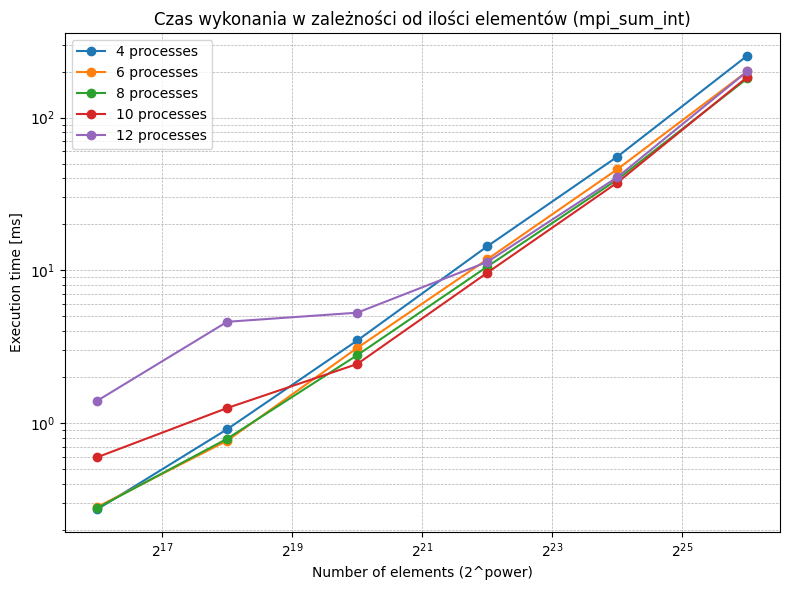

/tmp/ipykernel_40798/3753514428.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


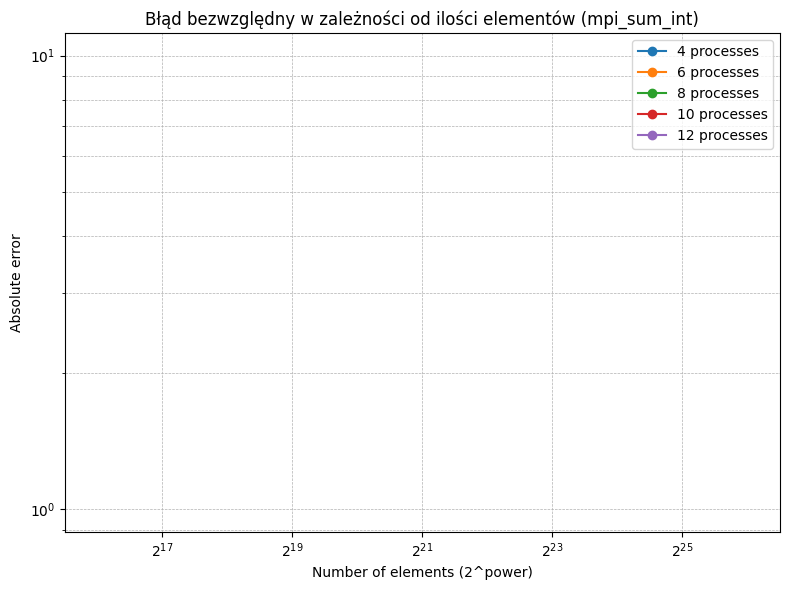

/tmp/ipykernel_40798/3753514428.py:54: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


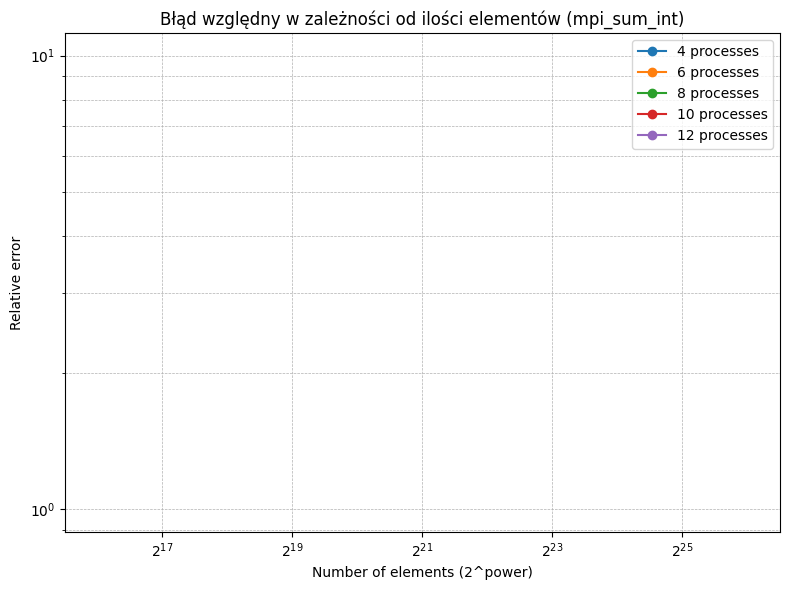

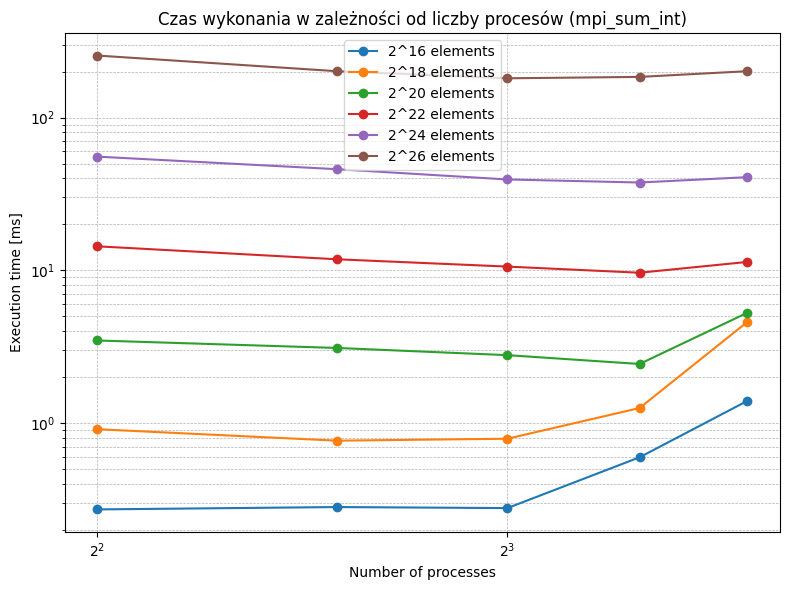

In [22]:
tech = "mpi"
op = "sum"
datatype = "int"

reduce_mean(f"../results/mpi/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)


### MPI - SUM - DOUBLE

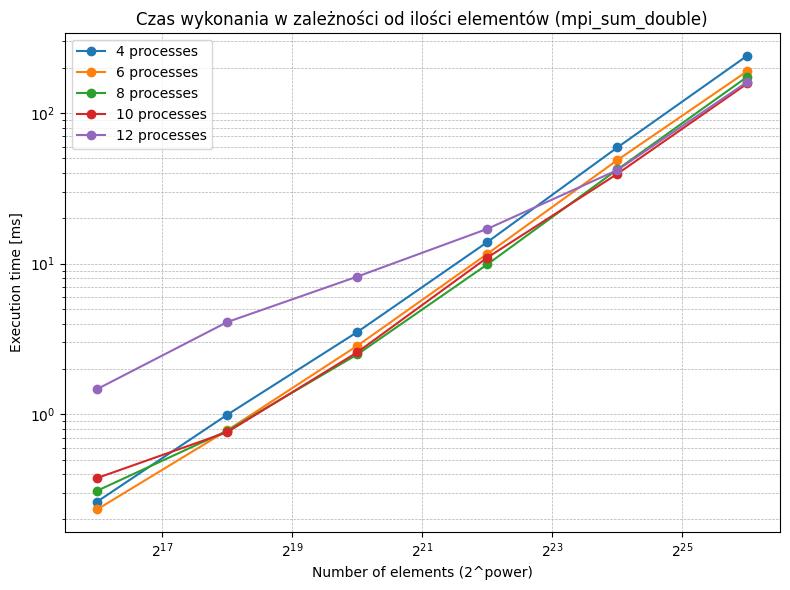

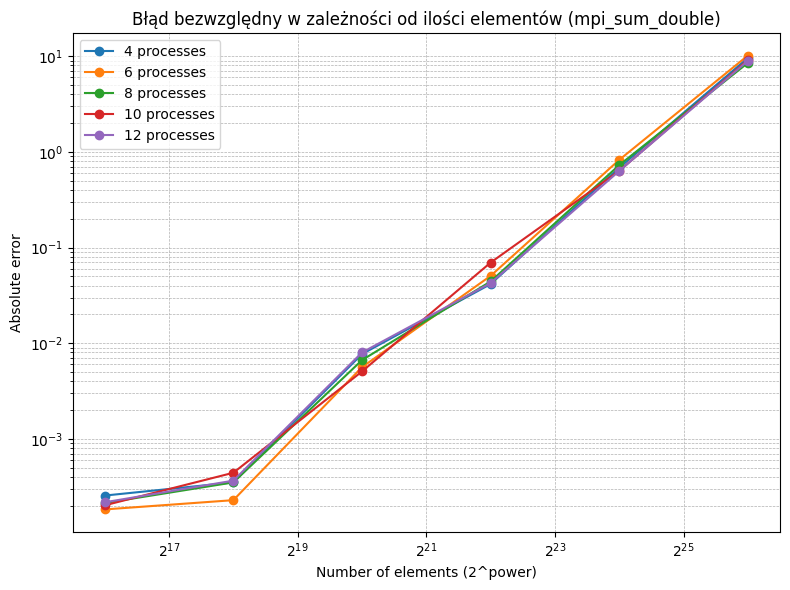

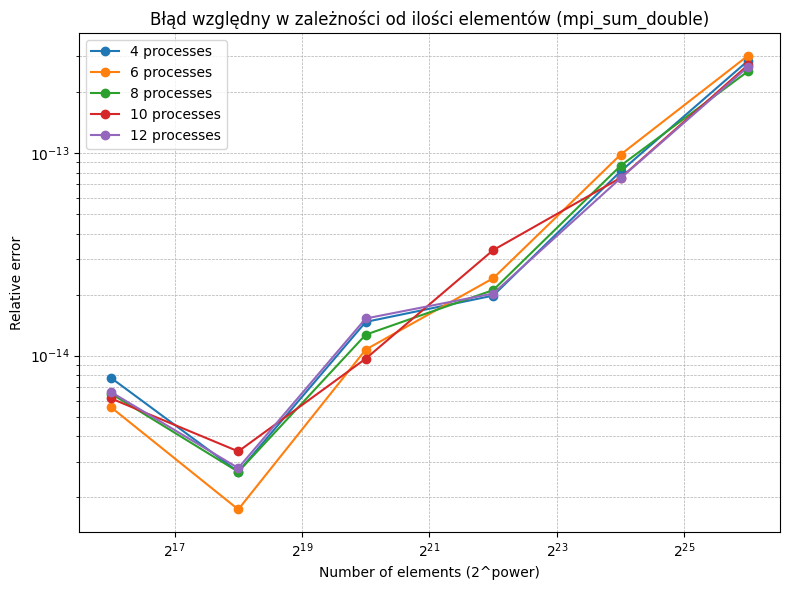

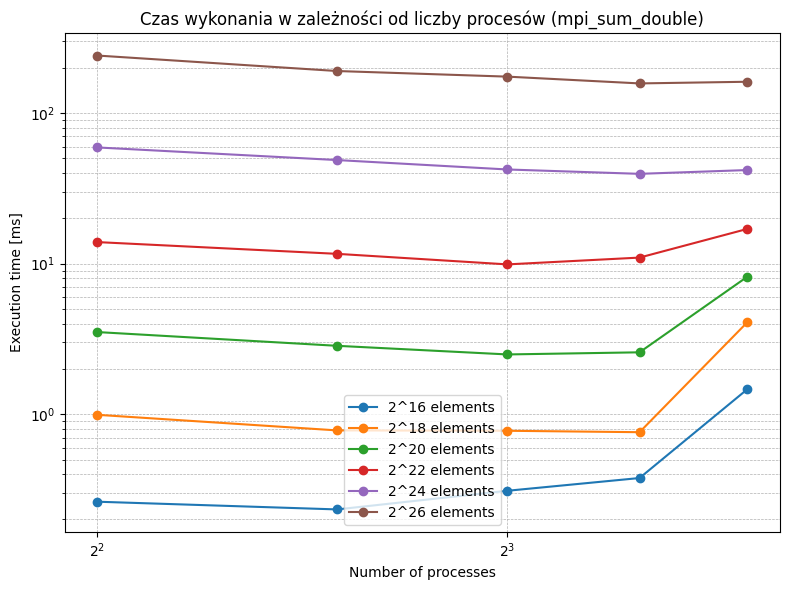

In [29]:
tech = "mpi"
op = "sum"
datatype = "double"

reduce_mean(f"../results/mpi/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

### MPI - MIN - INT

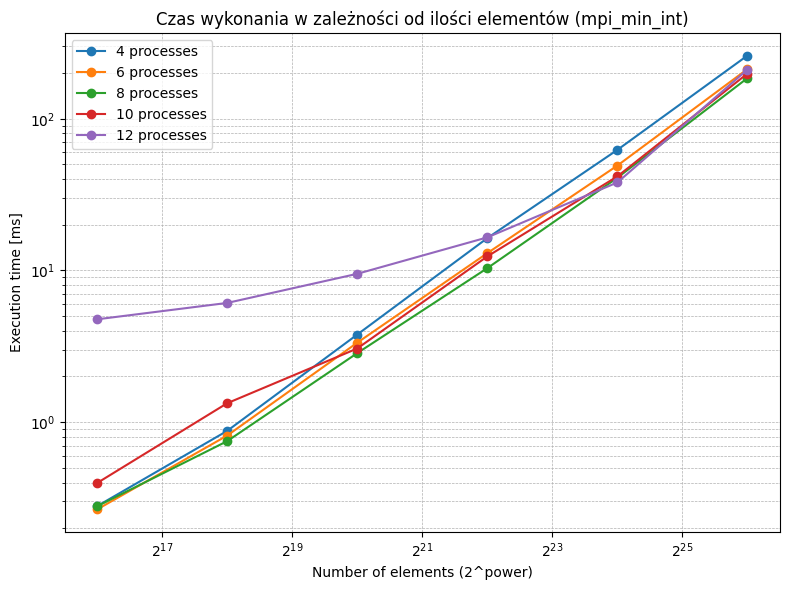

/tmp/ipykernel_40798/3753514428.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


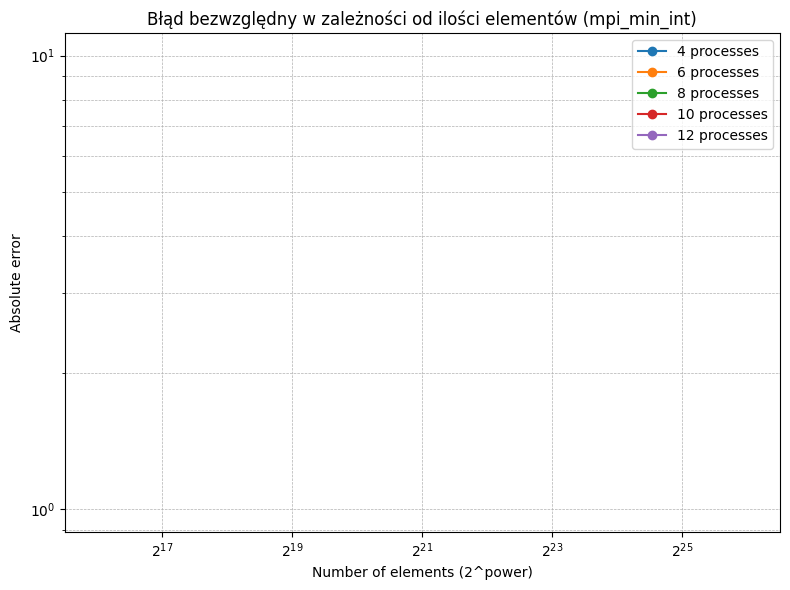

/tmp/ipykernel_40798/3753514428.py:54: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


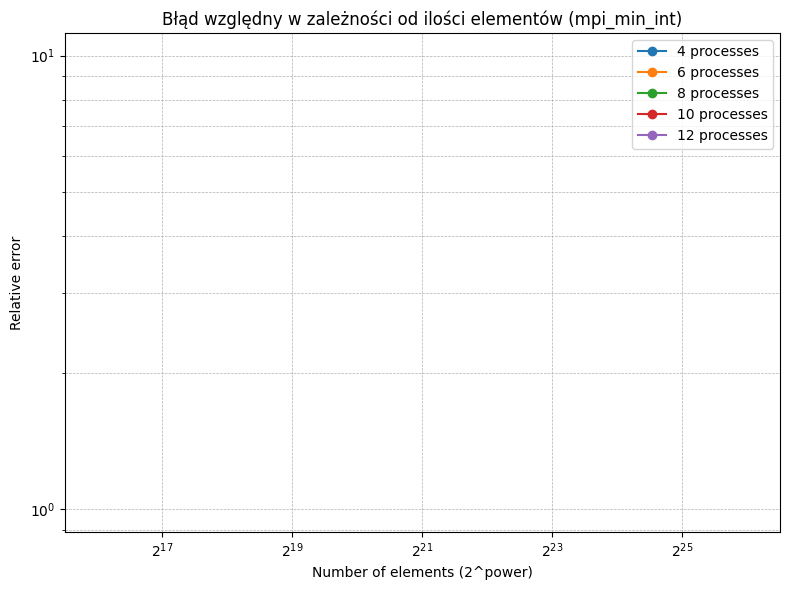

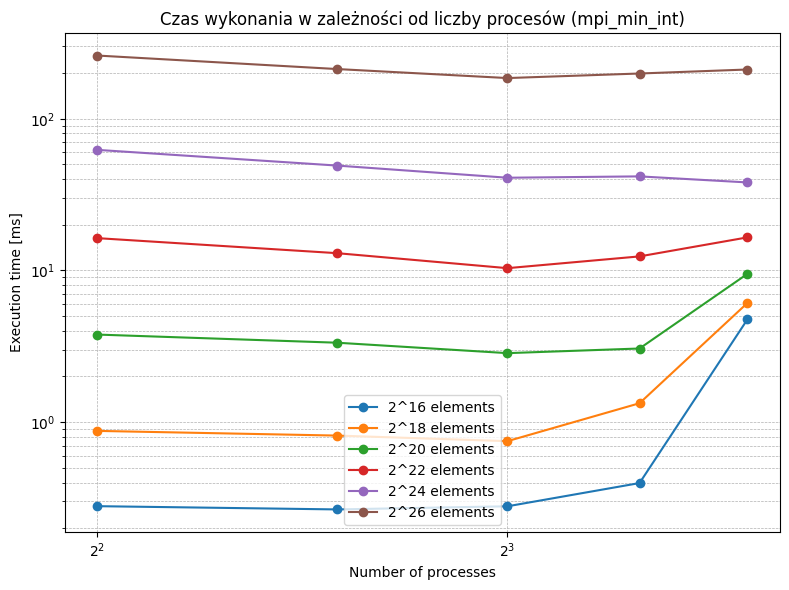

In [33]:
tech = "mpi"
op = "min"
datatype = "int"

reduce_mean(f"../results/mpi/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

### MPI - MIN - DOUBLE

Zapisano wynik do ../results/mpi/mpi_min_double.csv


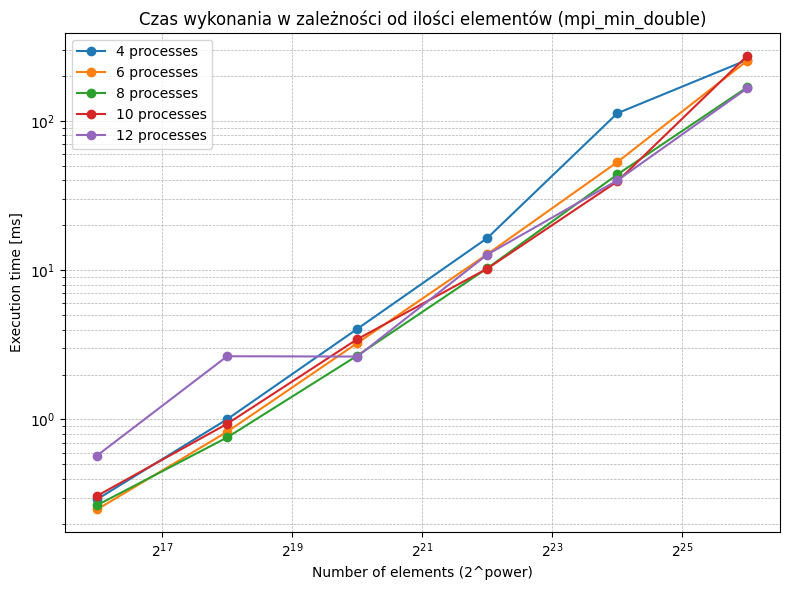

/tmp/ipykernel_40798/3753514428.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


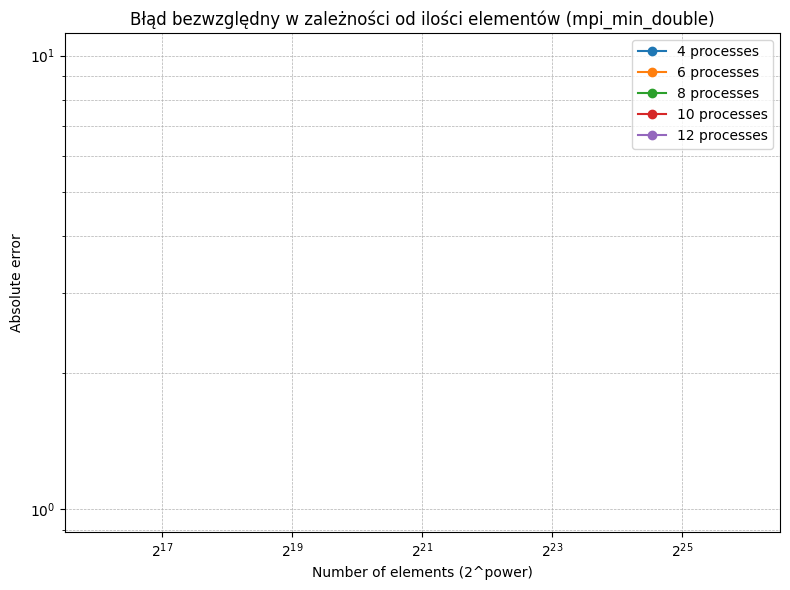

/tmp/ipykernel_40798/3753514428.py:54: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


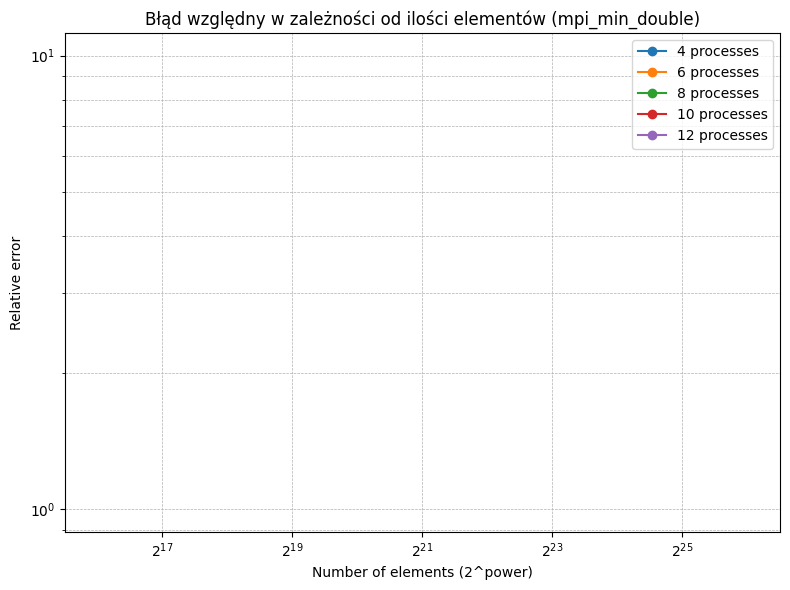

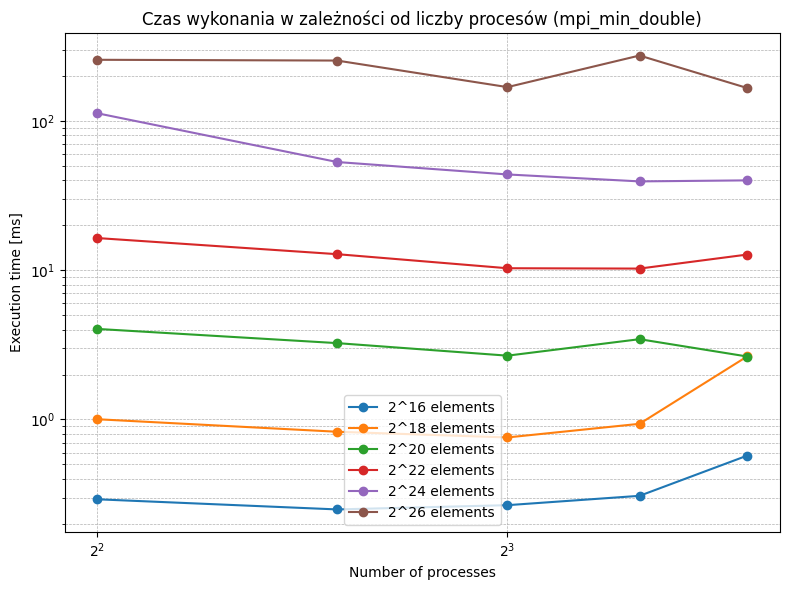

In [35]:
tech = "mpi"
op = "min"
datatype = "double"

reduce_mean(f"../results/mpi/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

### MPI - MAX - INT

Zapisano wynik do ../results/mpi/mpi_max_int.csv


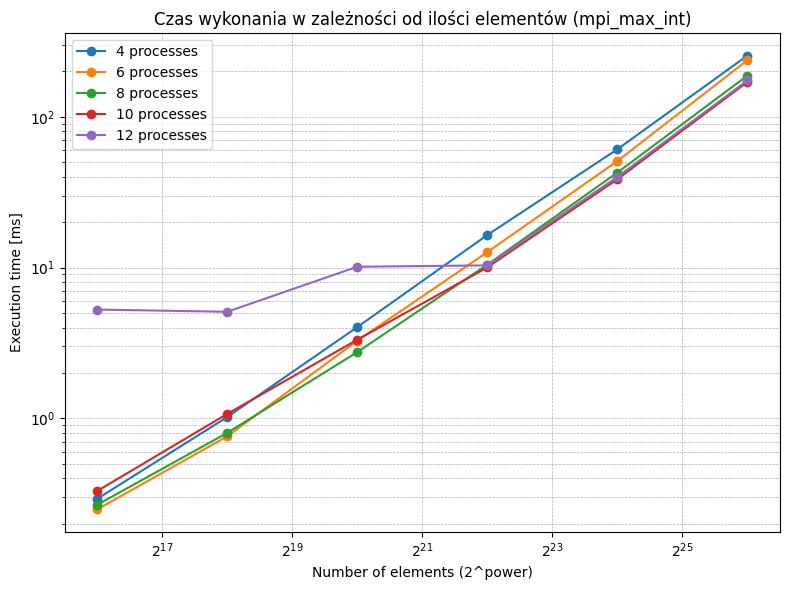

/tmp/ipykernel_40798/3753514428.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


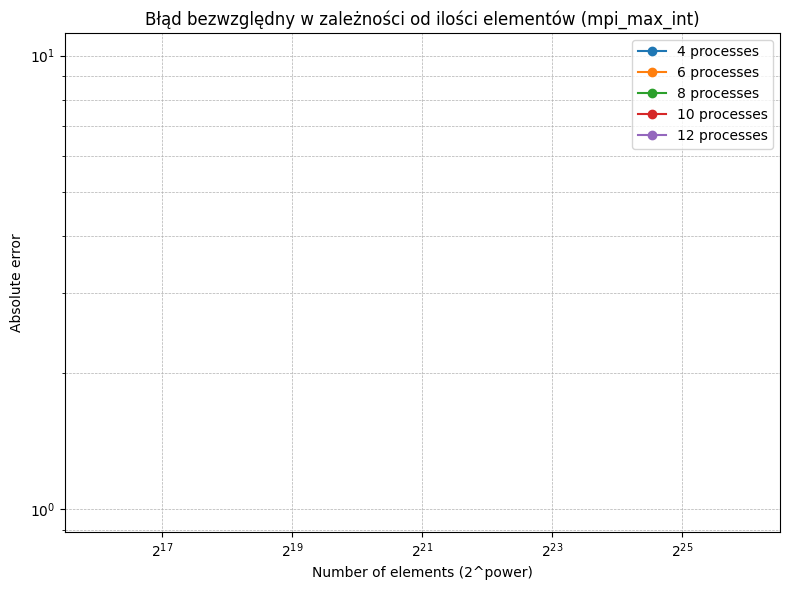

/tmp/ipykernel_40798/3753514428.py:54: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


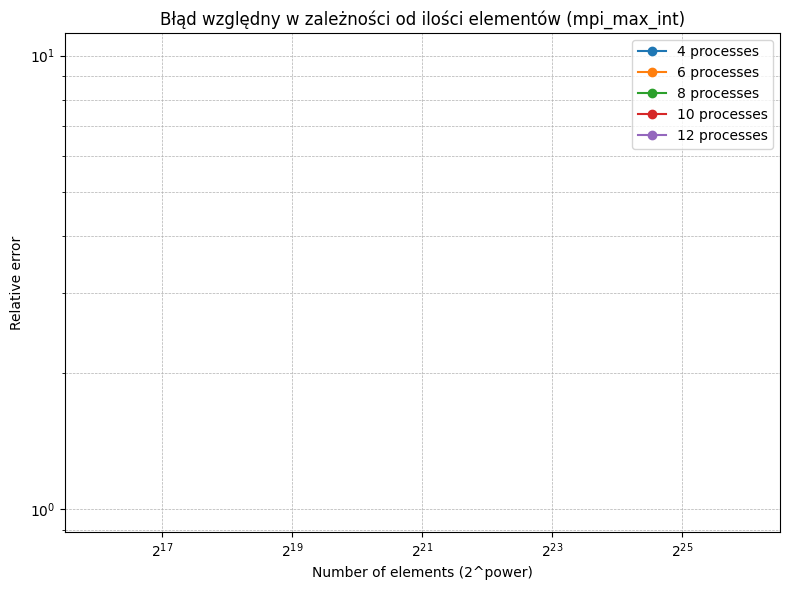

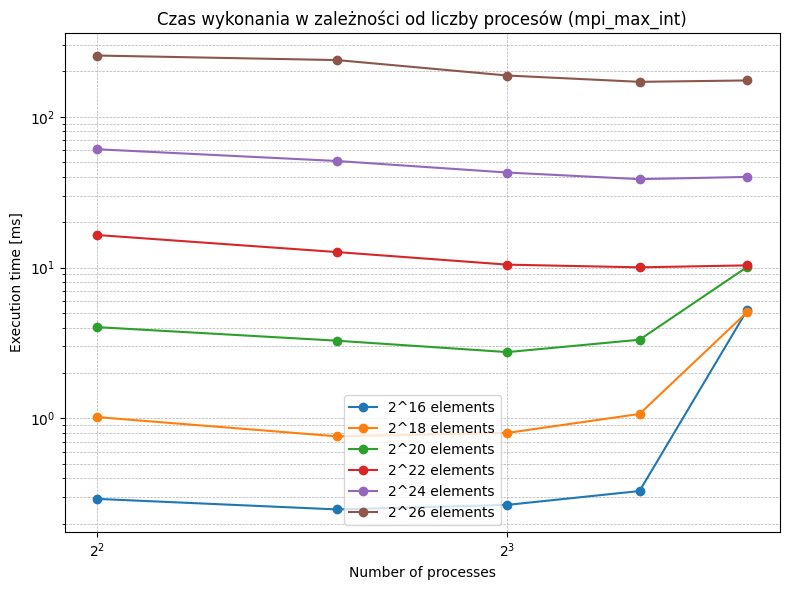

In [38]:
tech = "mpi"
op = "max"
datatype = "int"

reduce_mean(f"../results/mpi/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

### MPI - MAX - DOUBLE

Zapisano wynik do ../results/mpi/mpi_max_double.csv


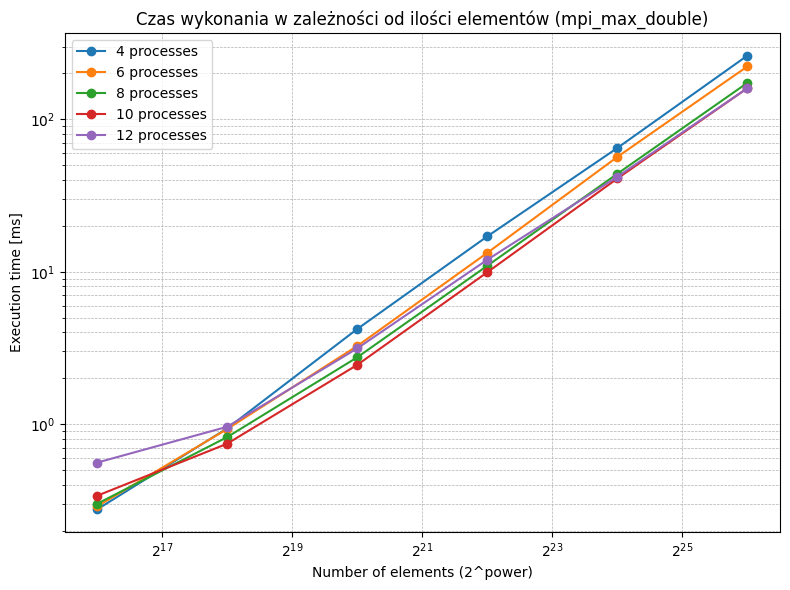

/tmp/ipykernel_40798/3753514428.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


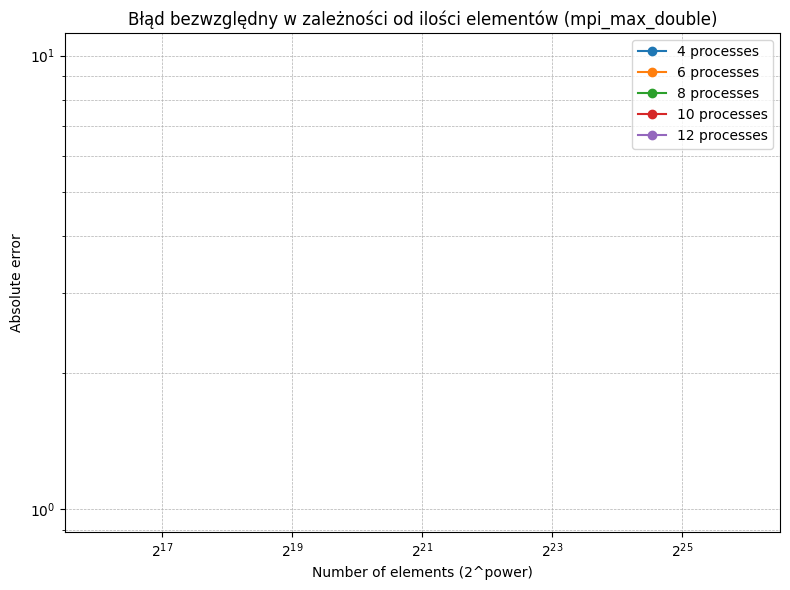

/tmp/ipykernel_40798/3753514428.py:54: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


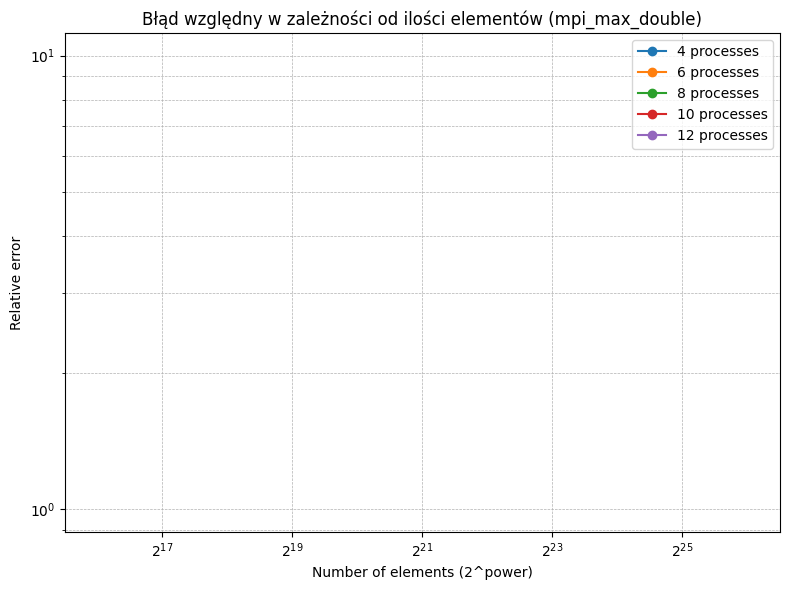

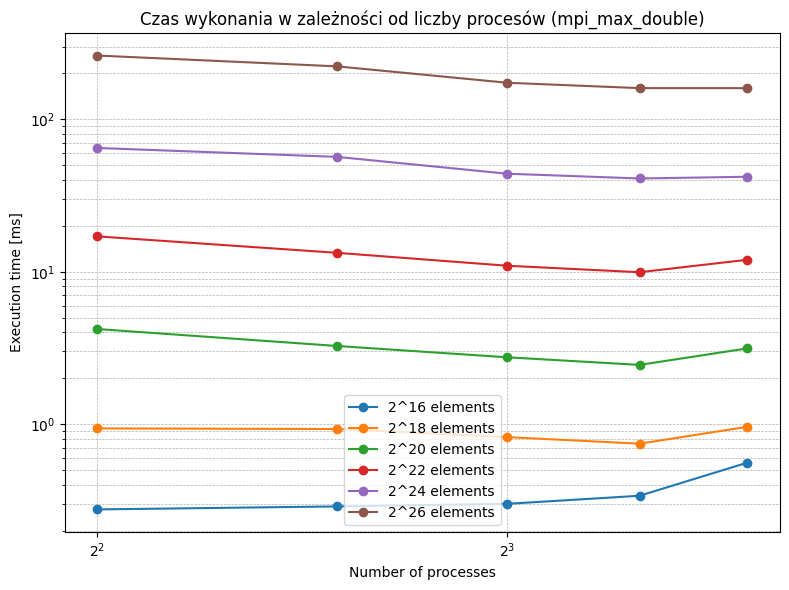

In [40]:
tech = "mpi"
op = "max"
datatype = "double"

reduce_mean(f"../results/mpi/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

### MPI - PREFIX - INT

Zapisano wynik do ../results/mpi/mpi_prefix_int.csv


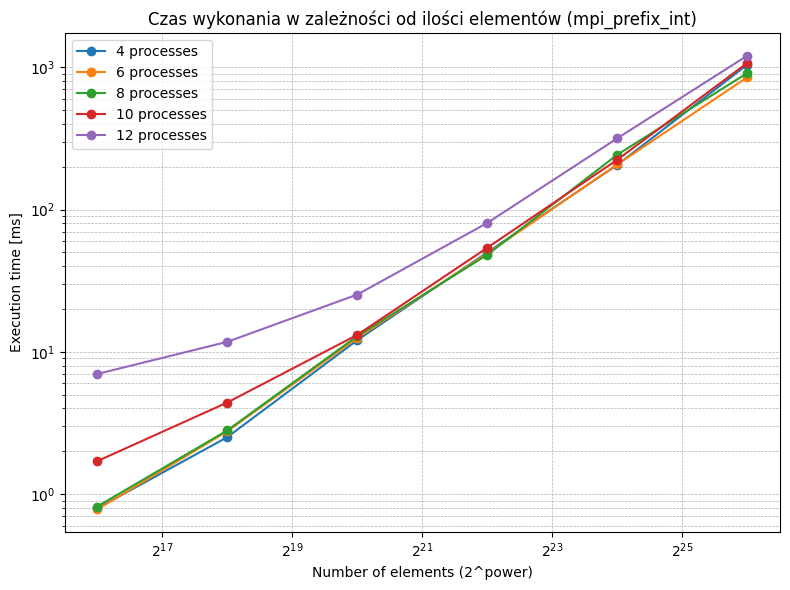

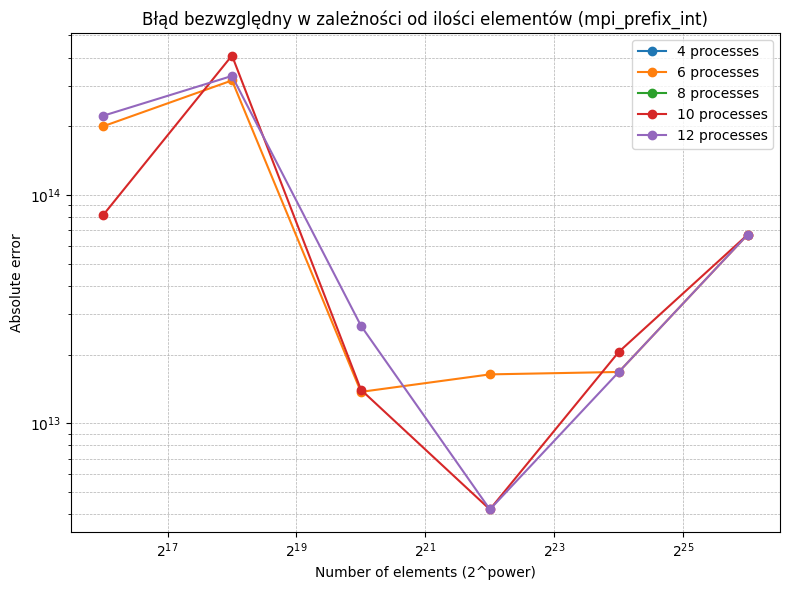

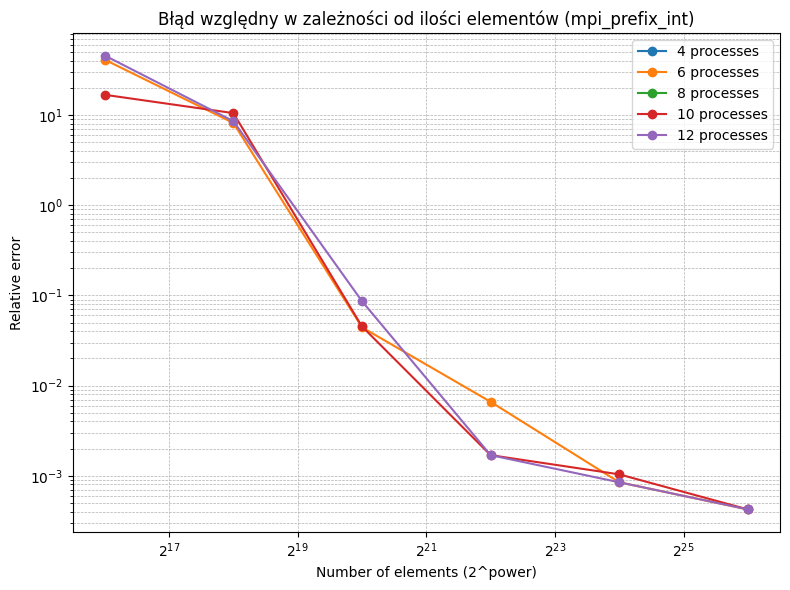

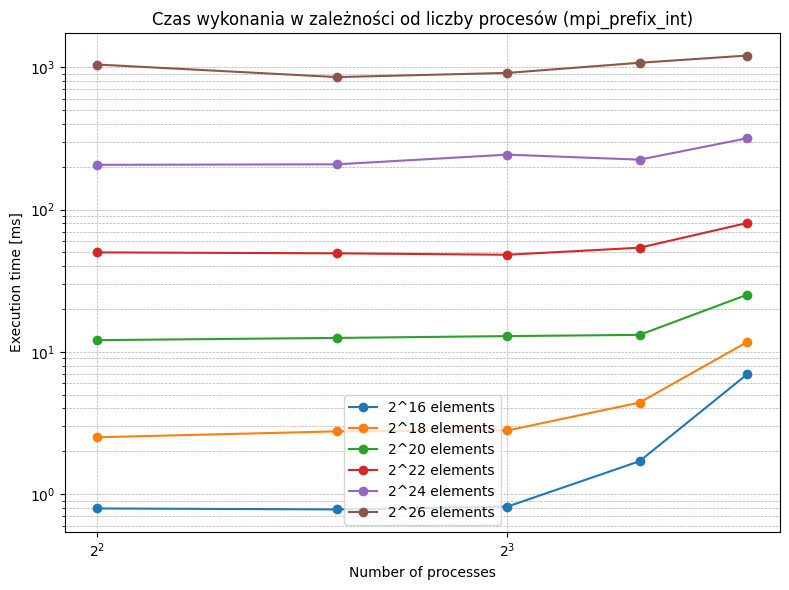

In [42]:
tech = "mpi"
op = "prefix"
datatype = "int"

reduce_mean(f"../results/mpi/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

### MPI - PREFIX - DOUBLE

Zapisano wynik do ../results/mpi/mpi_prefix_double.csv


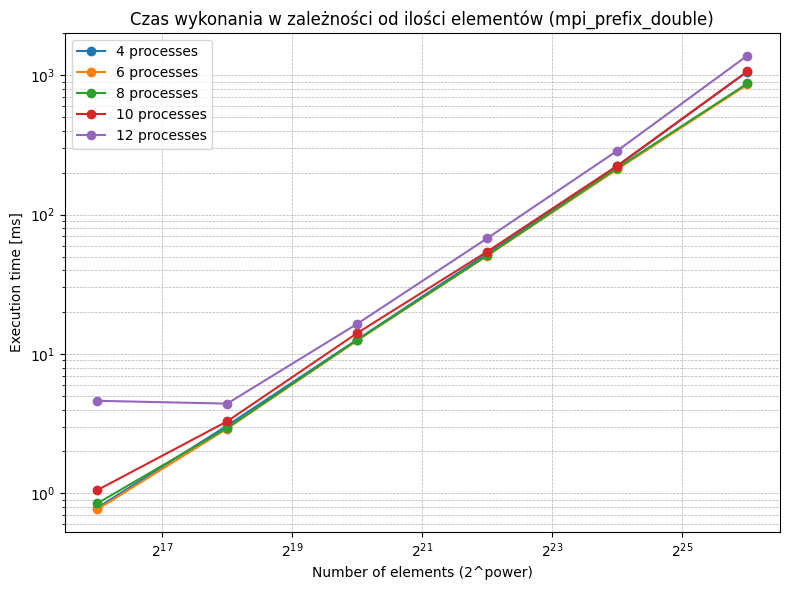

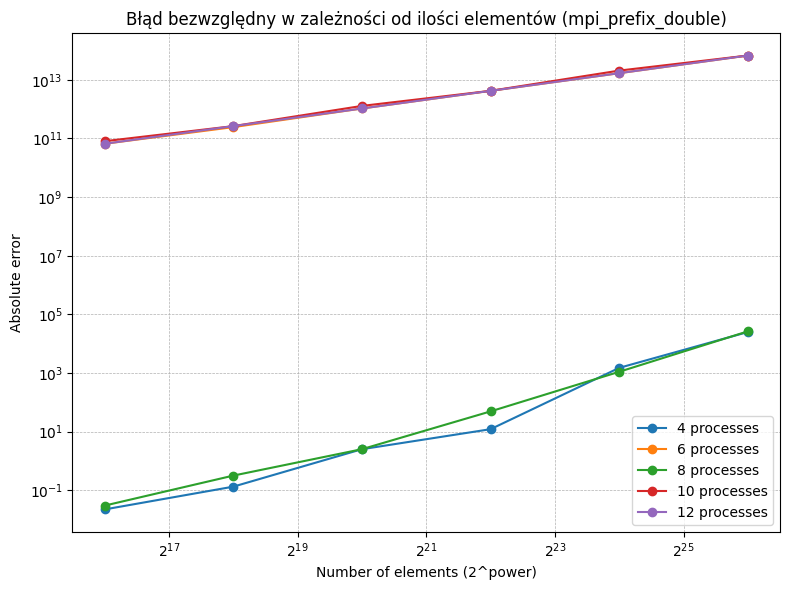

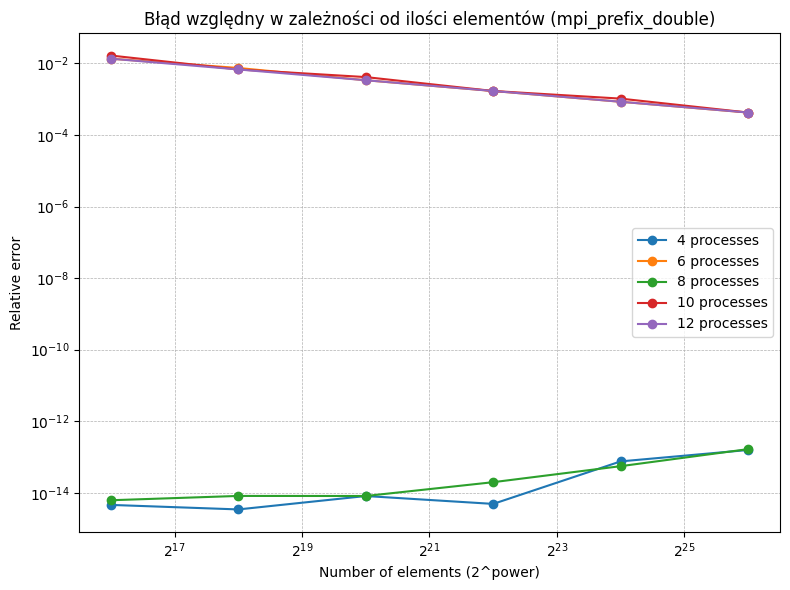

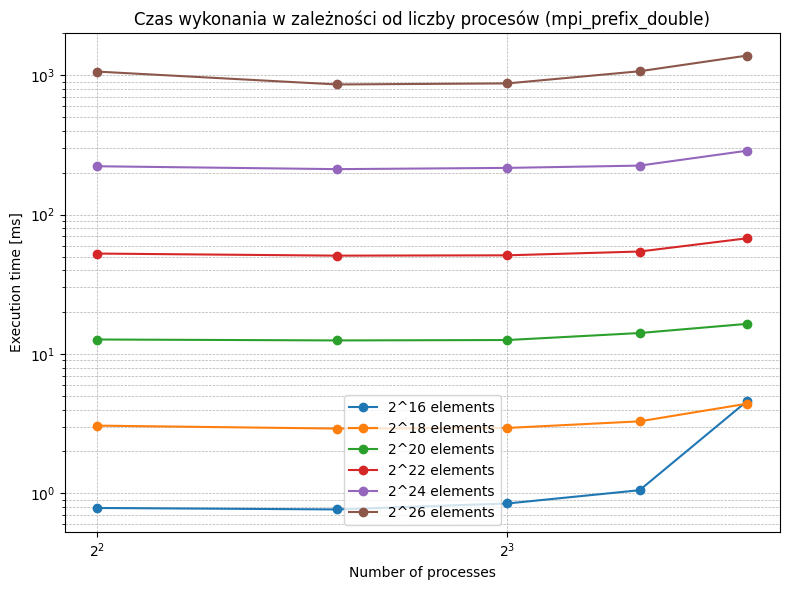

In [43]:
tech = "mpi"
op = "prefix"
datatype = "double"

reduce_mean(f"../results/mpi/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

## OPENMP

### Funkcja do liczenia średnich z plików csv dla OpenMP

In [2]:
def reduce_mean_openmp(path):
    df = pd.read_csv(path)
    result = (
        df.groupby(["power", "threads"], as_index=False)
        .agg({
            "time": "mean",
            "abs_err": "mean",
            "rel_err": "mean"
        })
    )
    result.to_csv(path, index=False)
    print("Zapisano wynik do", path)

### Funkcja do wyświetlania wykresów dla OpenMP

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_time_vs_elements(df, dtype_label="int64_t"):
    """
    Wykres: czas wykonania (ms) w zależności od ilości elementów (2^power)
    Serie odpowiadają liczbie wątków.
    """
    plt.figure(figsize=(8,6))
    for proc, group in df.groupby("threads"):
        plt.plot(2**group["power"], group["time"], marker='o', label=f"{proc} threads")

    plt.xscale('log', base=2)
    plt.yscale('log')
    plt.xlabel("Number of elements (2^power)")
    plt.ylabel("Execution time [ms]")
    plt.title(f"Czas wykonania w zależności od ilości elementów ({dtype_label})")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()


def plot_abs_error_vs_elements(df, dtype_label="int64_t"):
    """
    Wykres: błąd bezwzględny w zależności od ilości elementów
    Serie odpowiadają liczbie procesów.
    """
    plt.figure(figsize=(8,6))
    for proc, group in df.groupby("threads"):
        plt.plot(2**group["power"], group["abs_err"], marker='o', label=f"{proc} threads")

    plt.xscale('log', base=2)
    plt.yscale('log')
    plt.xlabel("Number of elements (2^power)")
    plt.ylabel("Absolute error")
    plt.title(f"Błąd bezwzględny w zależności od ilości elementów ({dtype_label})")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()


def plot_rel_error_vs_elements(df, dtype_label="int64_t"):
    """
    Wykres: błąd względny w zależności od ilości elementów
    Serie odpowiadają liczbie procesów.
    """
    plt.figure(figsize=(8,6))
    for proc, group in df.groupby("threads"):
        plt.plot(2**group["power"], group["rel_err"], marker='o', label=f"{proc} threads")

    plt.xscale('log', base=2)
    plt.yscale('log')
    plt.xlabel("Number of elements (2^power)")
    plt.ylabel("Relative error")
    plt.title(f"Błąd względny w zależności od ilości elementów ({dtype_label})")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()


def plot_time_vs_processes(df, dtype_label="int64_t"):
    """
    Wykres: czas wykonania w zależności od liczby wątków
    (dla każdego rozmiaru danych osobna linia).
    """
    plt.figure(figsize=(8,6))
    for power, group in df.groupby("power"):
        plt.plot(group["threads"], group["time"], marker='o', label=f"2^{power} elements")

    plt.xscale('log', base=2)
    plt.yscale('log')
    plt.xlabel("Number of threads")
    plt.ylabel("Execution time [ms]")
    plt.title(f"Czas wykonania w zależności od liczby wątków ({dtype_label})")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.tight_layout()
    plt.show()

### OpenMP - SUM - INT

Zapisano wynik do ../results/openmp/openmp_sum_int.csv


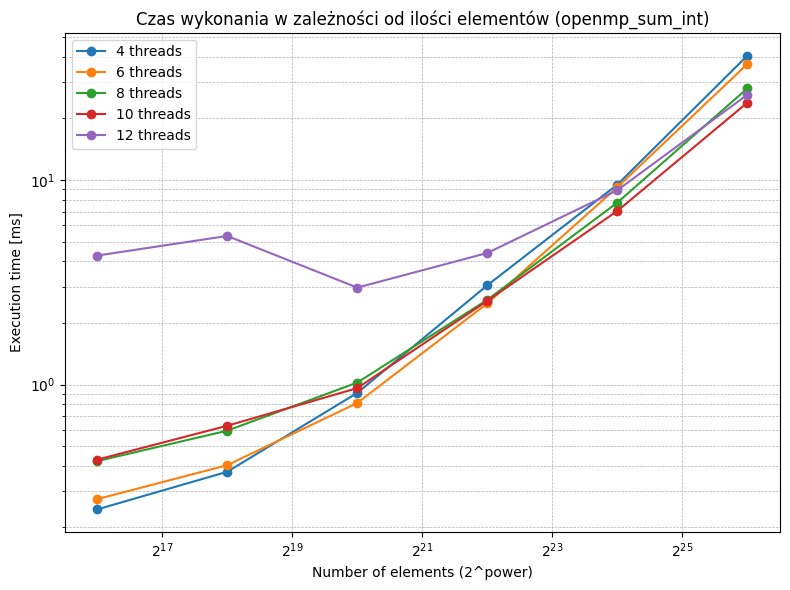

/tmp/ipykernel_40798/3534376971.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


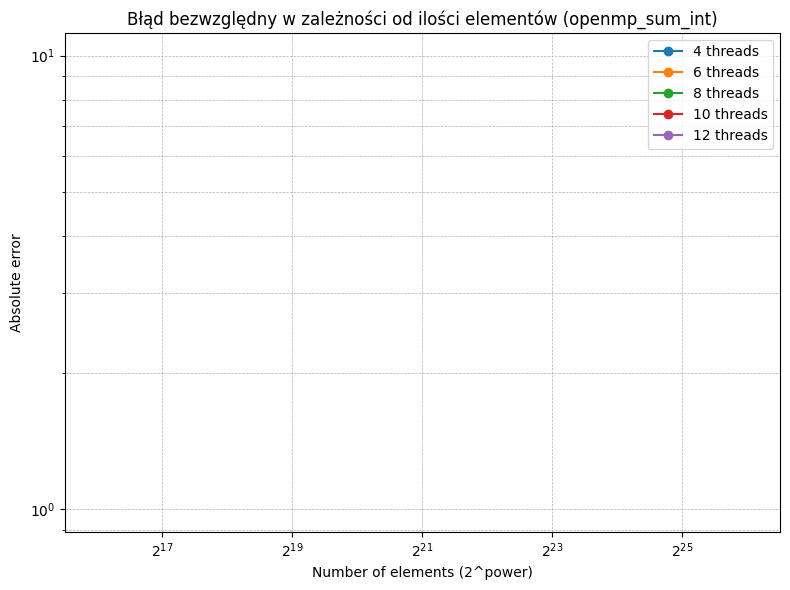

/tmp/ipykernel_40798/3534376971.py:54: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


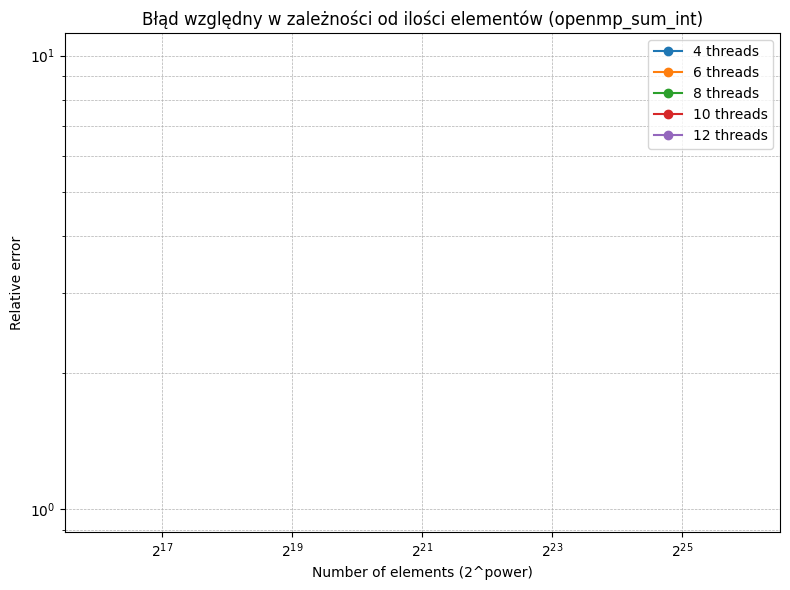

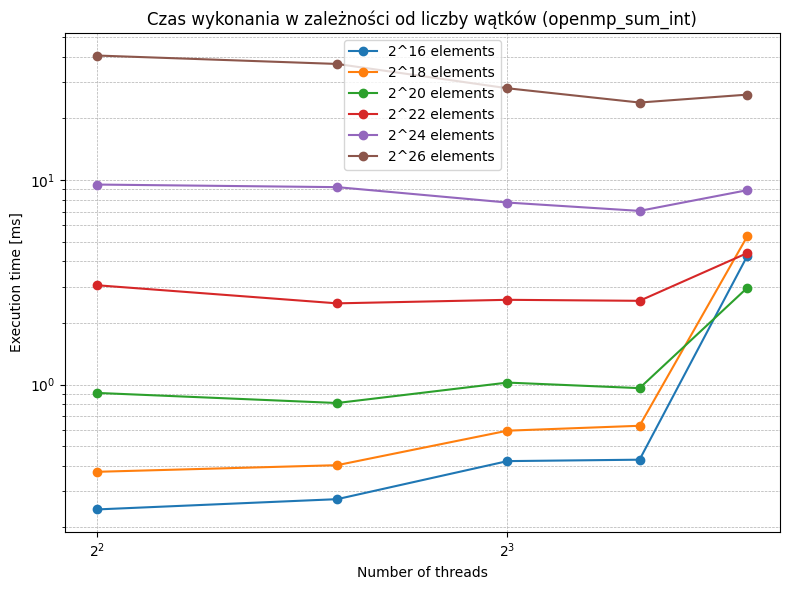

In [48]:
tech = "openmp"
op = "sum"
datatype = "int"

reduce_mean_openmp(f"../results/{tech}/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

### OpenMP - SUM - DOUBLE

Zapisano wynik do ../results/openmp/openmp_sum_double.csv


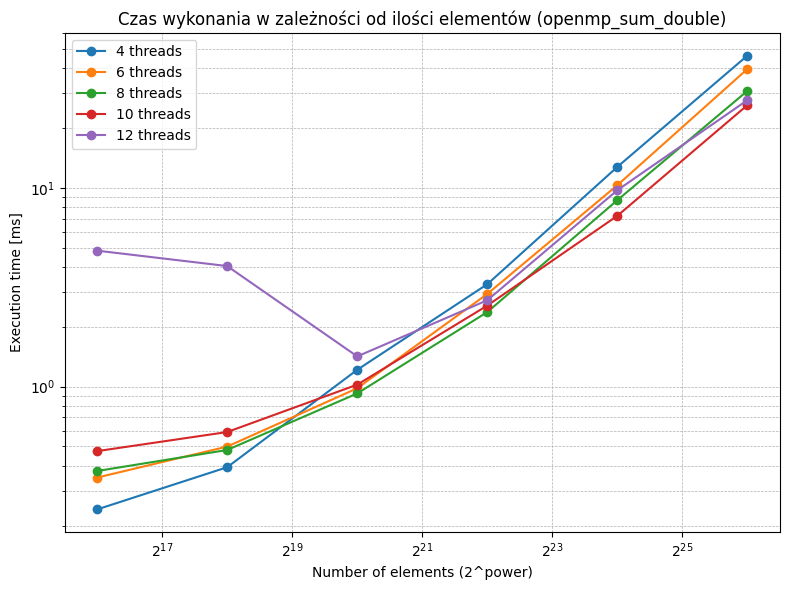

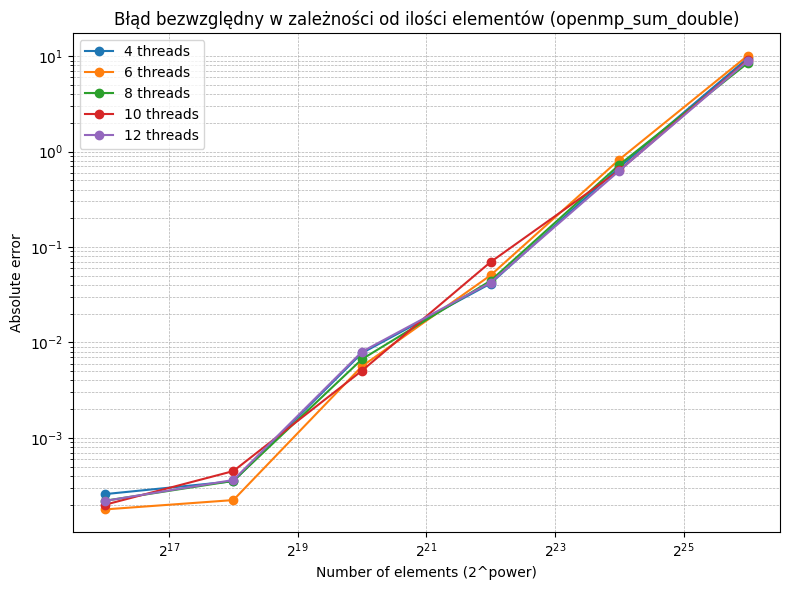

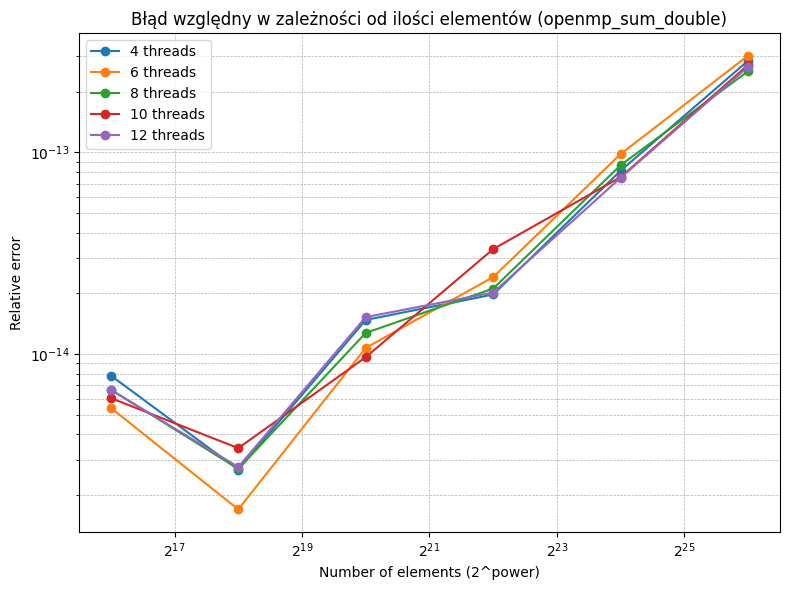

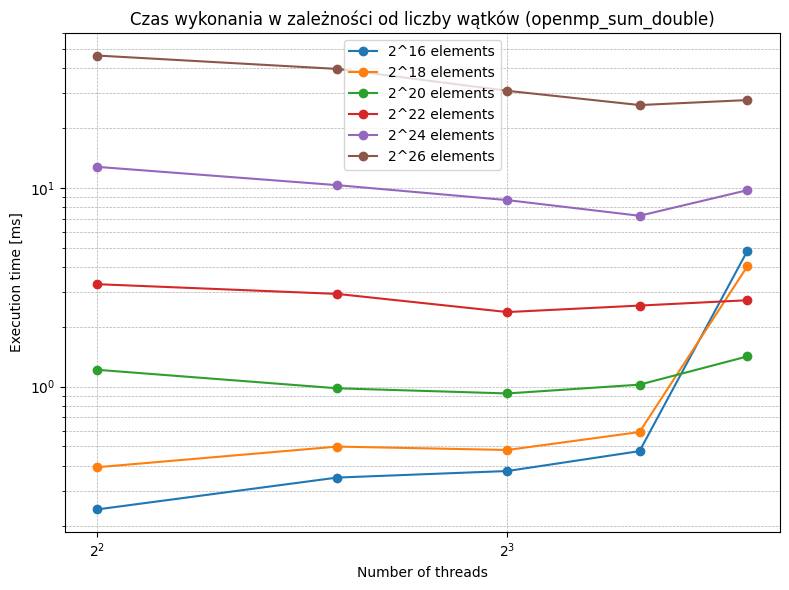

In [50]:
tech = "openmp"
op = "sum"
datatype = "double"

reduce_mean_openmp(f"../results/{tech}/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

### OpenMP - MIN - INT

Zapisano wynik do ../results/openmp/openmp_min_int.csv


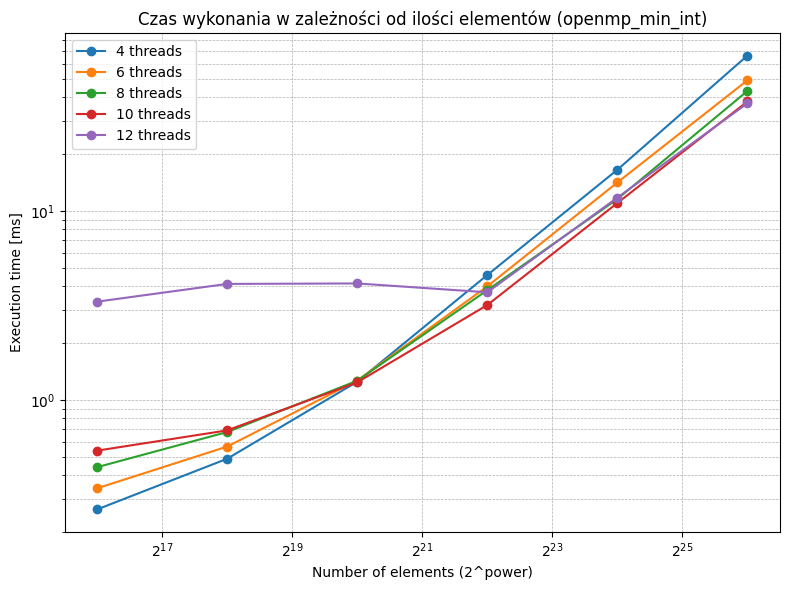

/tmp/ipykernel_40798/3534376971.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


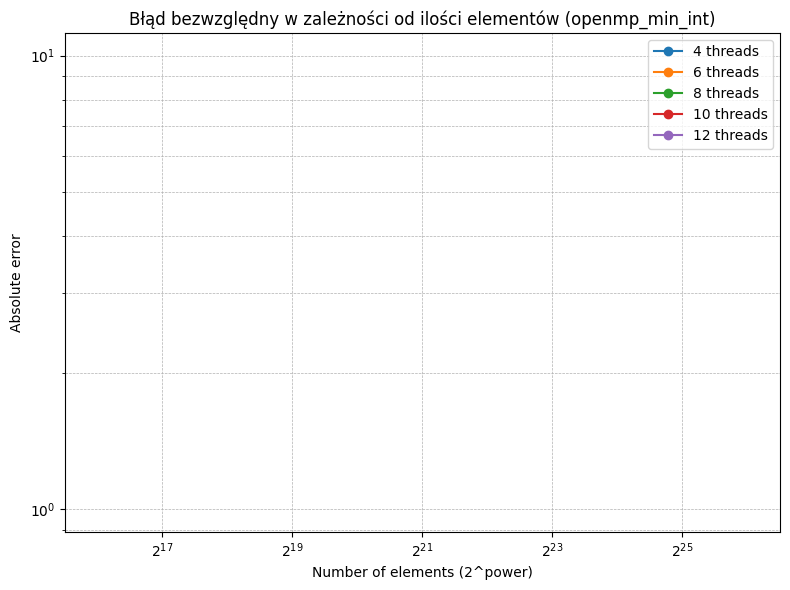

/tmp/ipykernel_40798/3534376971.py:54: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


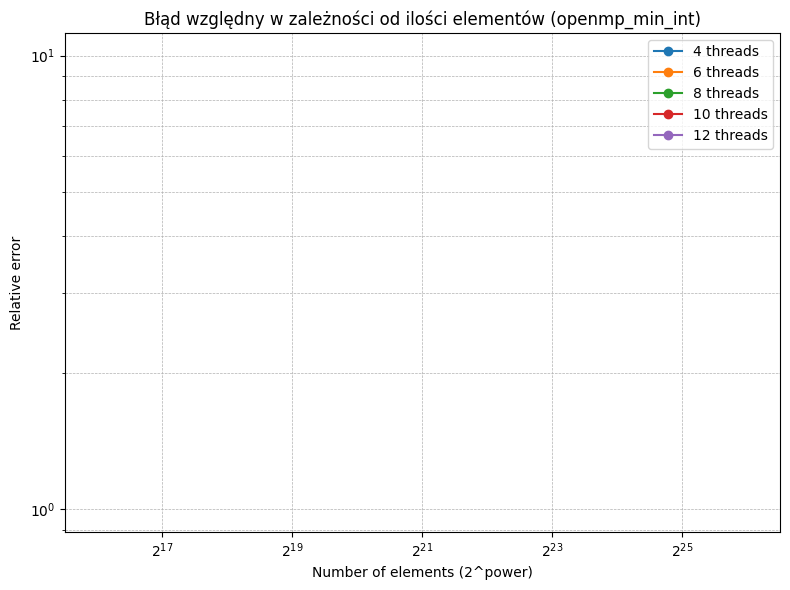

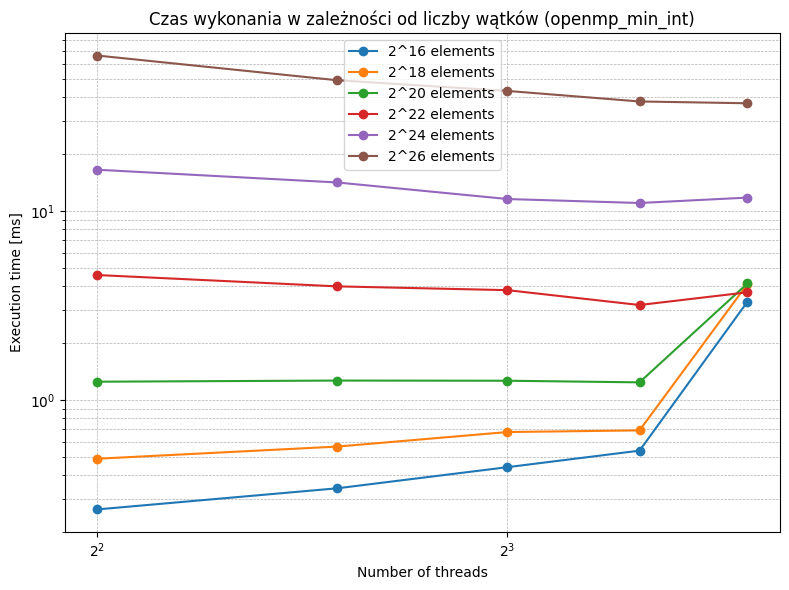

In [51]:
tech = "openmp"
op = "min"
datatype = "int"

reduce_mean_openmp(f"../results/{tech}/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

### OpenMP - MIN - DOUBLE

Zapisano wynik do ../results/openmp/openmp_min_double.csv


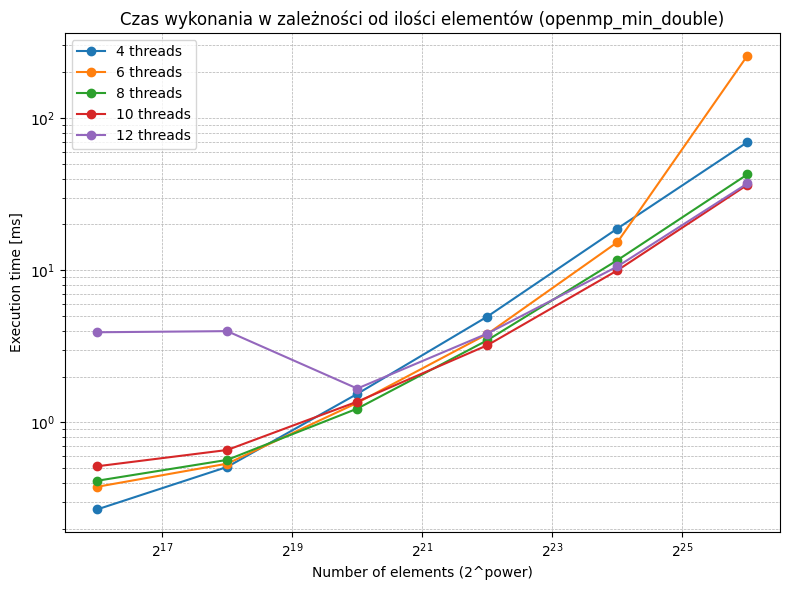

/tmp/ipykernel_40798/3534376971.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


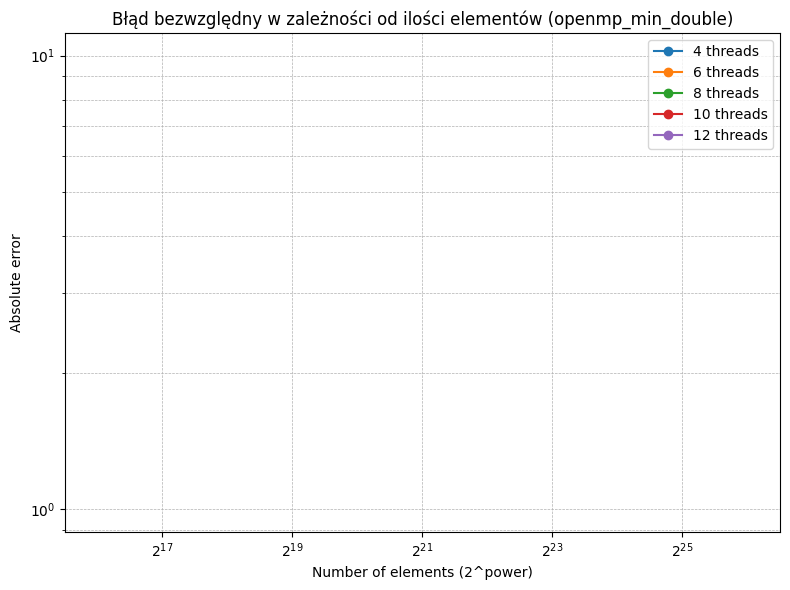

/tmp/ipykernel_40798/3534376971.py:54: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


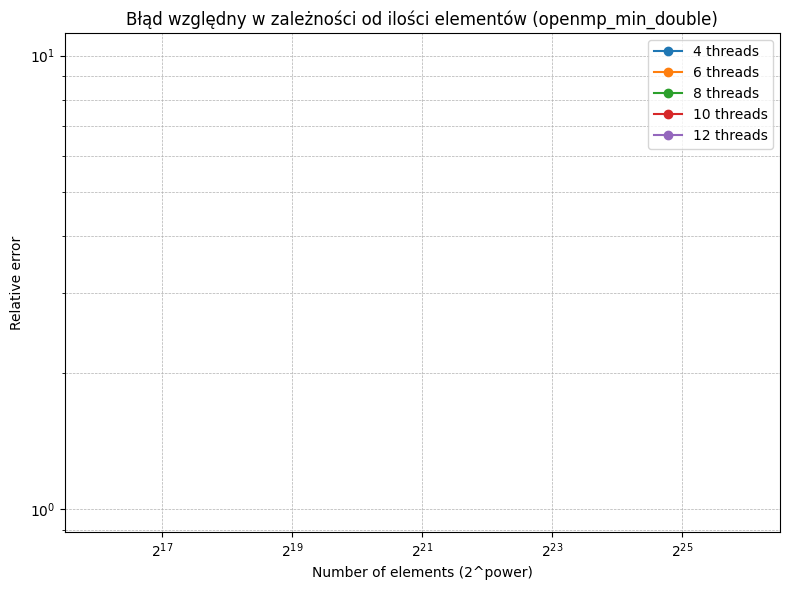

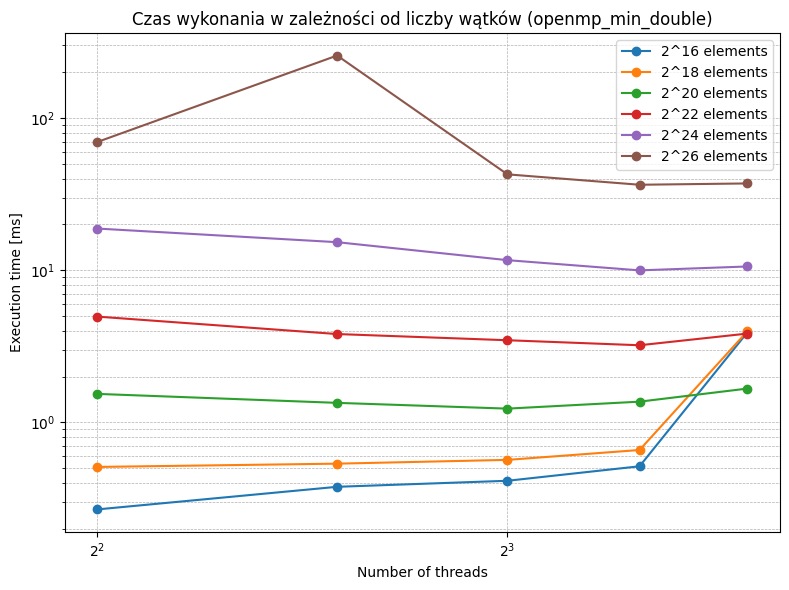

In [52]:
tech = "openmp"
op = "min"
datatype = "double"

reduce_mean_openmp(f"../results/{tech}/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

### OpenMP - MAX - INT

Zapisano wynik do ../results/openmp/openmp_max_int.csv


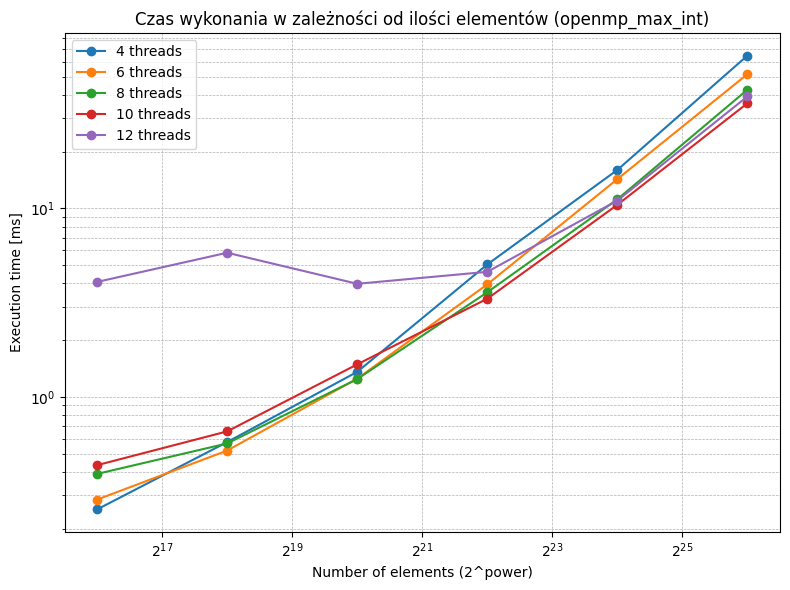

/tmp/ipykernel_40798/3534376971.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


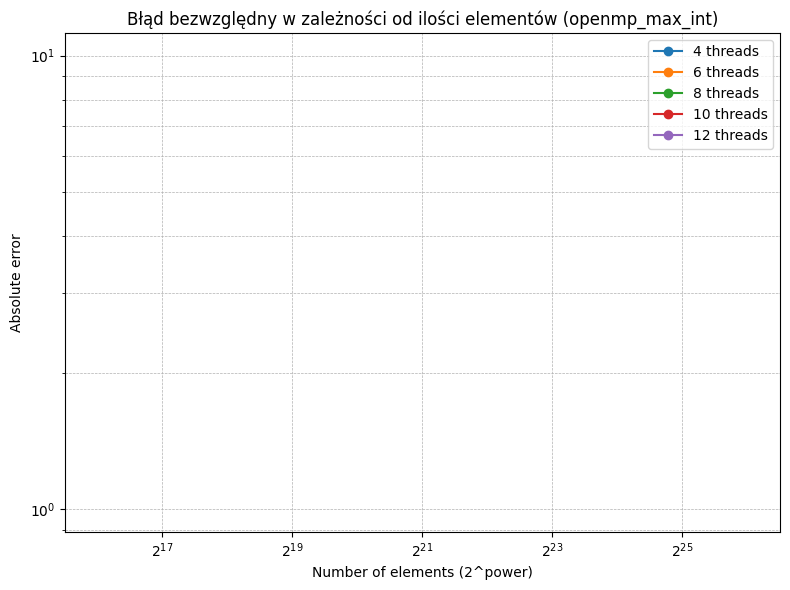

/tmp/ipykernel_40798/3534376971.py:54: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


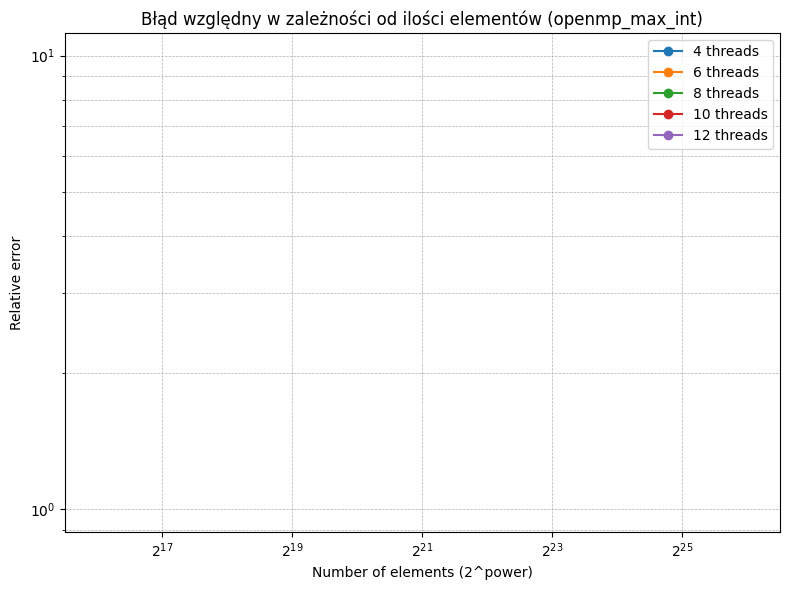

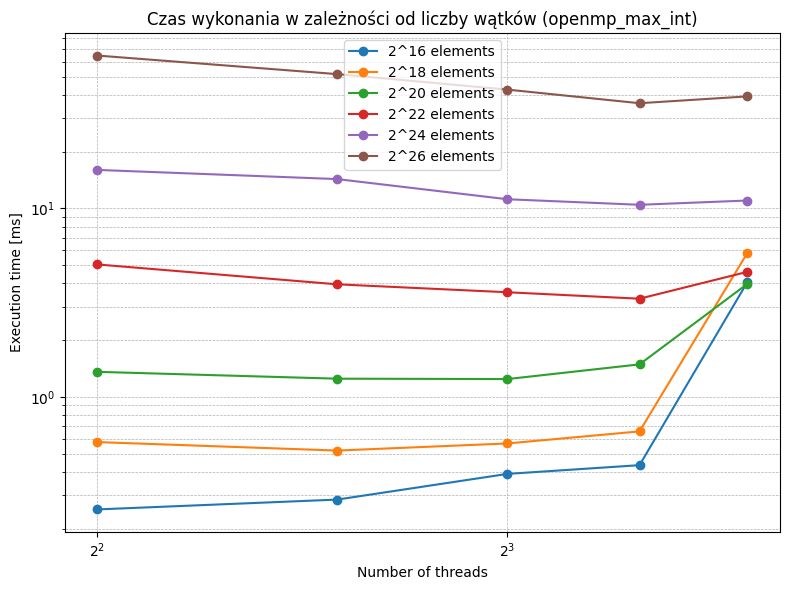

In [53]:
tech = "openmp"
op = "max"
datatype = "int"

reduce_mean_openmp(f"../results/{tech}/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

### OpenMP - MAX - DOUBLE

Zapisano wynik do ../results/openmp/openmp_max_double.csv


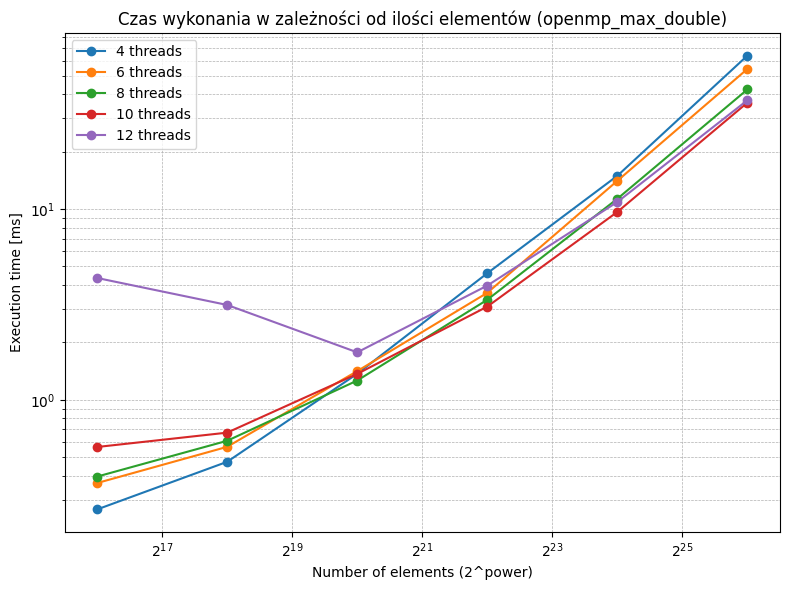

/tmp/ipykernel_40798/3534376971.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


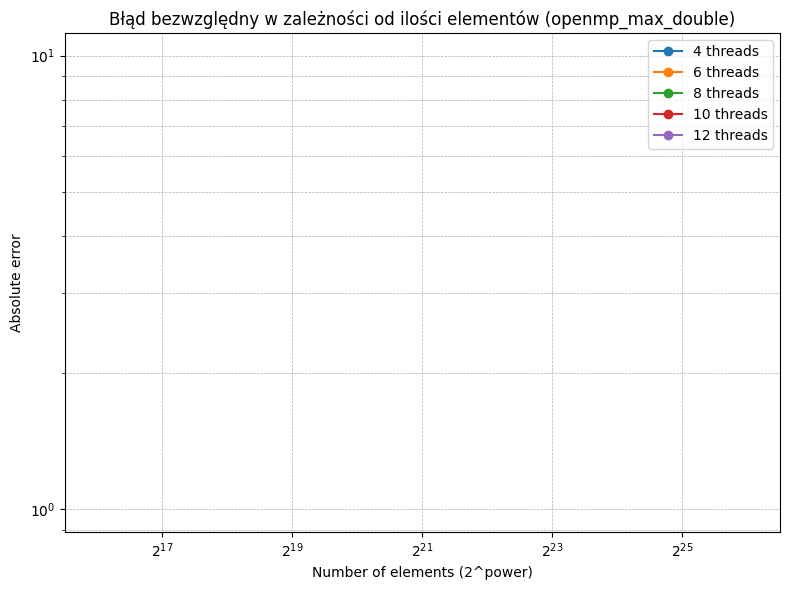

/tmp/ipykernel_40798/3534376971.py:54: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


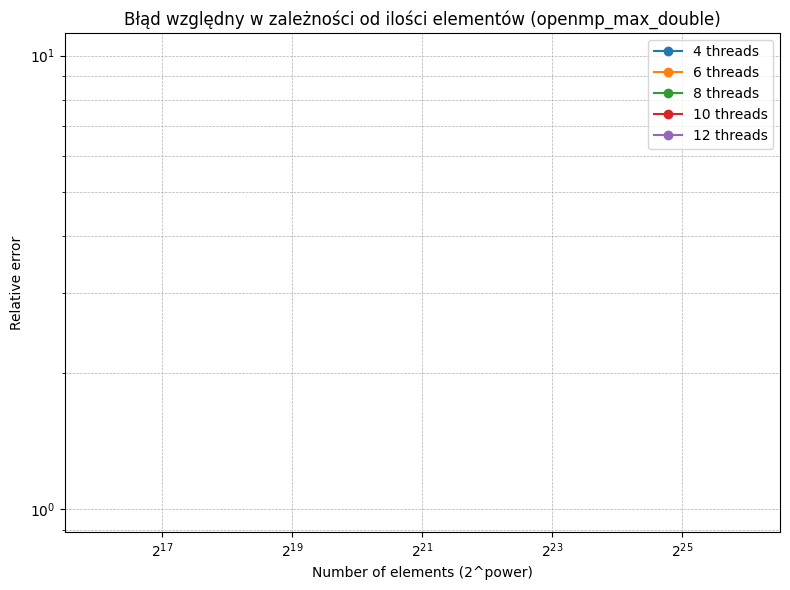

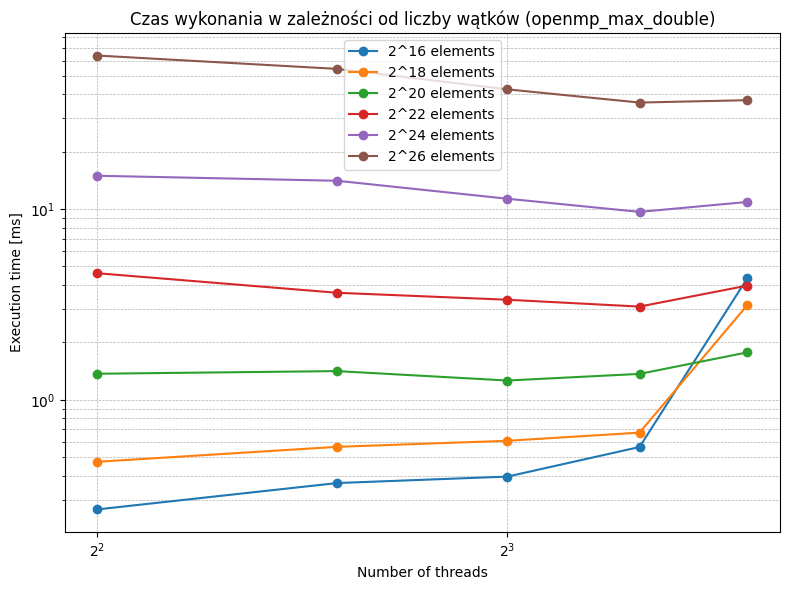

In [54]:
tech = "openmp"
op = "max"
datatype = "double"

reduce_mean_openmp(f"../results/{tech}/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

### OpenMP - PREFIX - INT

Zapisano wynik do ../results/openmp/openmp_prefix_int.csv


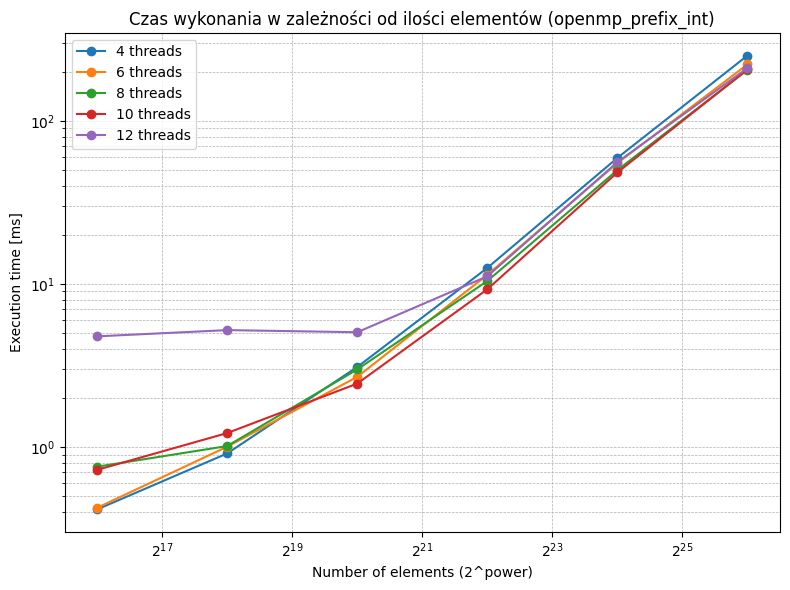

/tmp/ipykernel_40798/3534376971.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


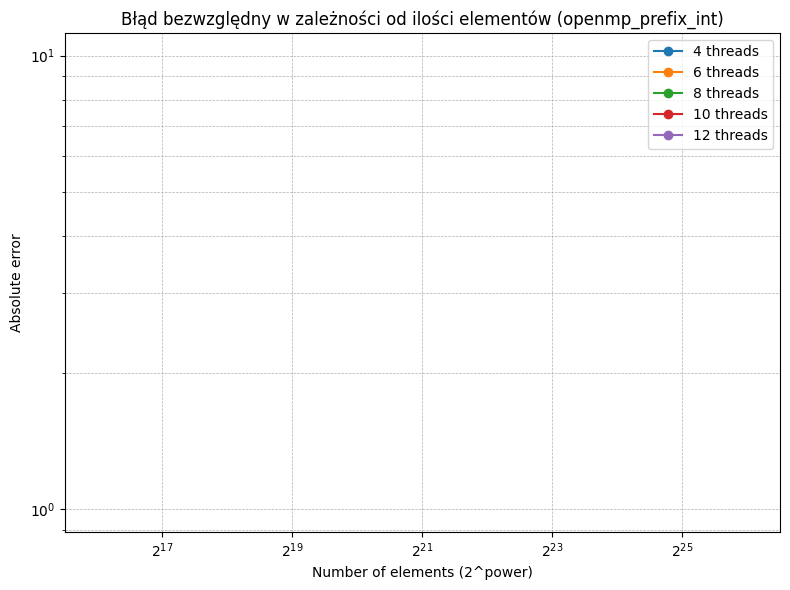

/tmp/ipykernel_40798/3534376971.py:54: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


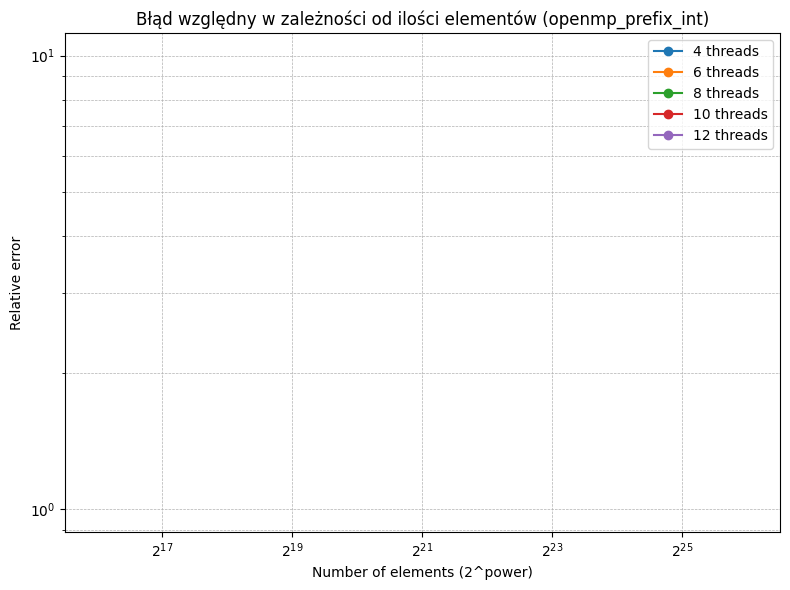

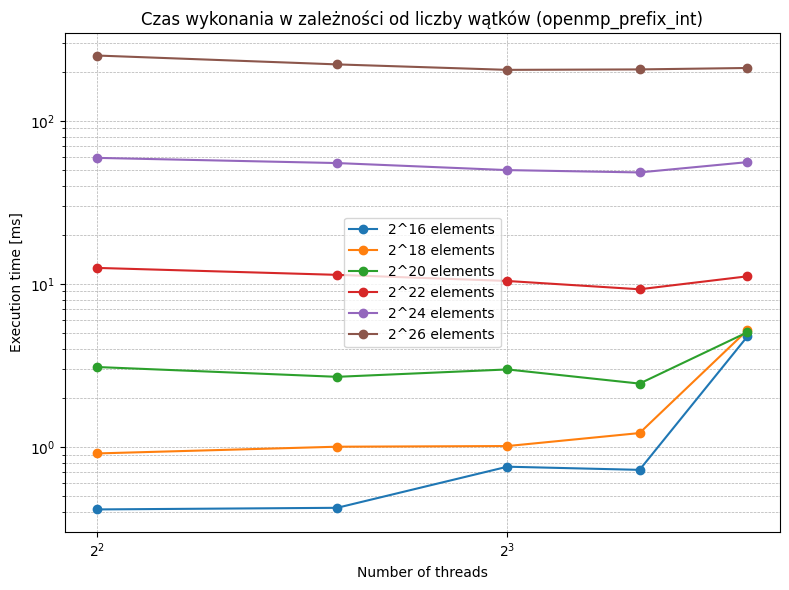

In [55]:
tech = "openmp"
op = "prefix"
datatype = "int"

reduce_mean_openmp(f"../results/{tech}/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

### OpenMP - PREFIX - DOUBLE

Zapisano wynik do ../results/openmp/openmp_prefix_double.csv


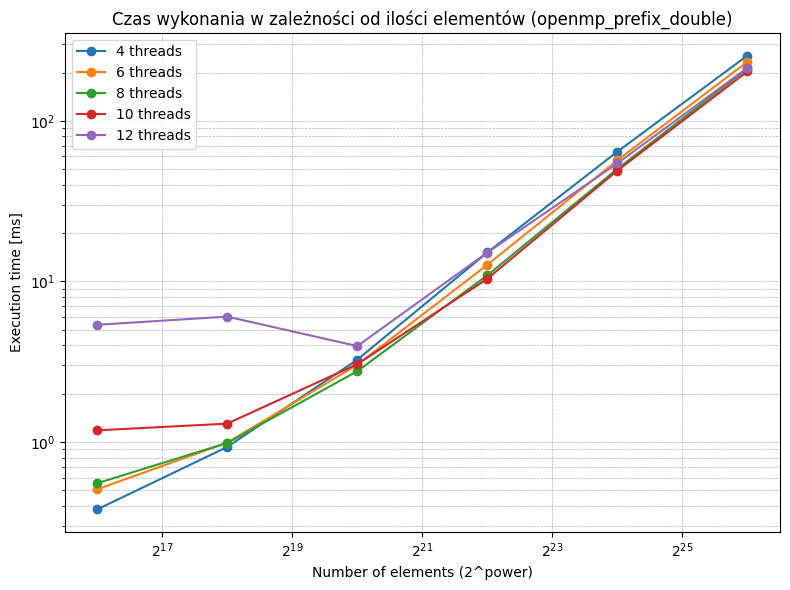

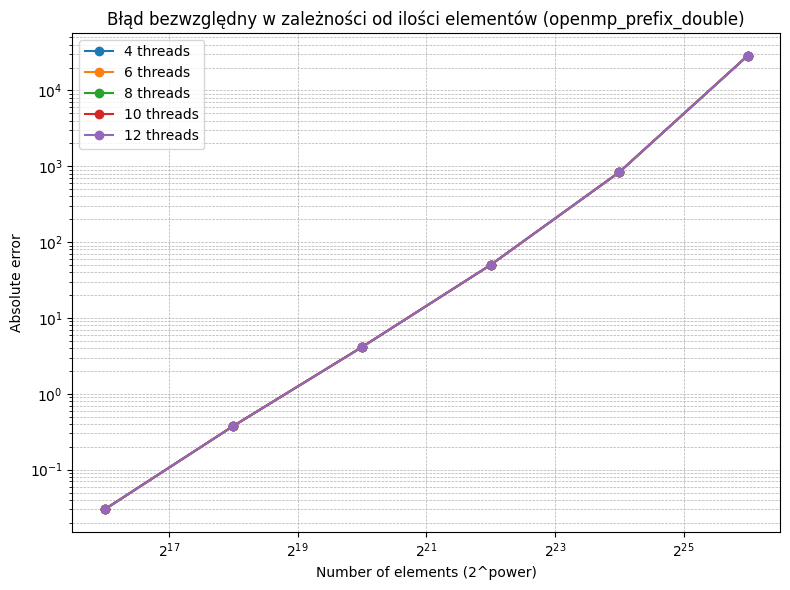

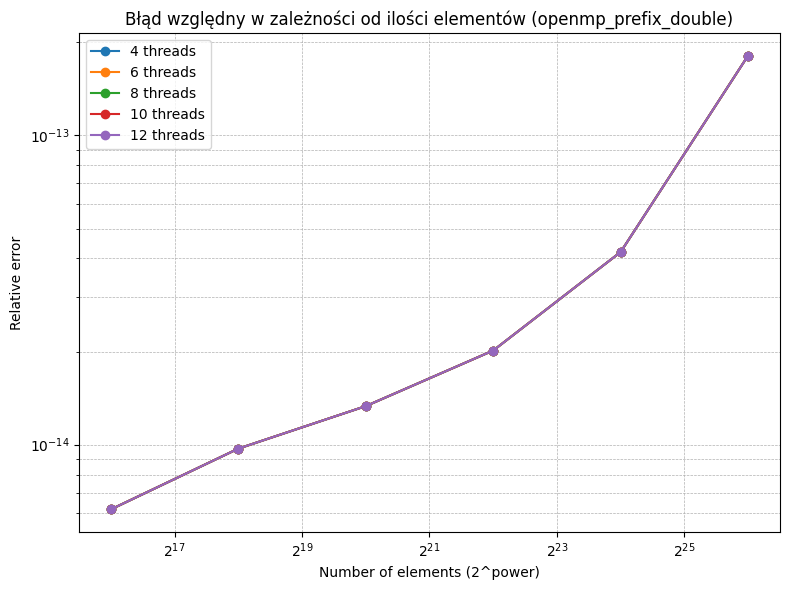

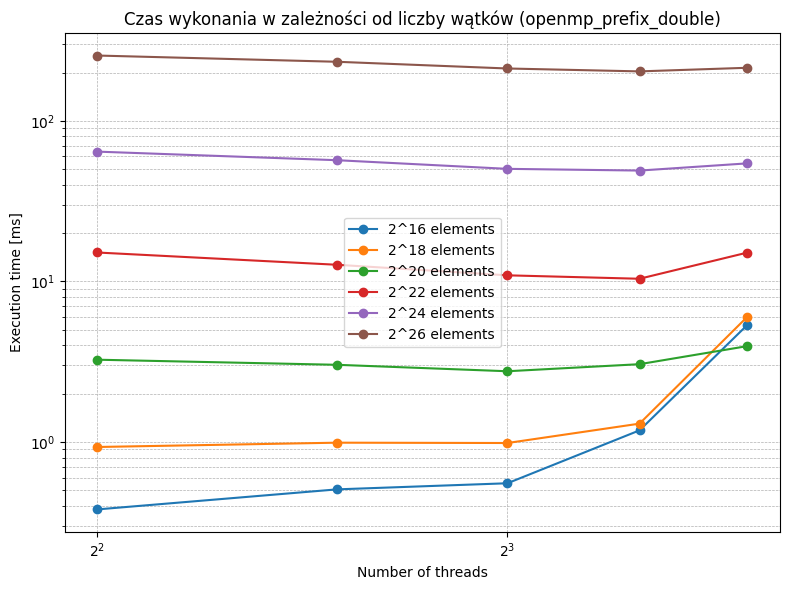

In [57]:
tech = "openmp"
op = "prefix"
datatype = "double"

reduce_mean_openmp(f"../results/{tech}/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

## CUDA

### CUDA - SUM - INT

Zapisano wynik do ../results/cuda/cuda_sum_int.csv


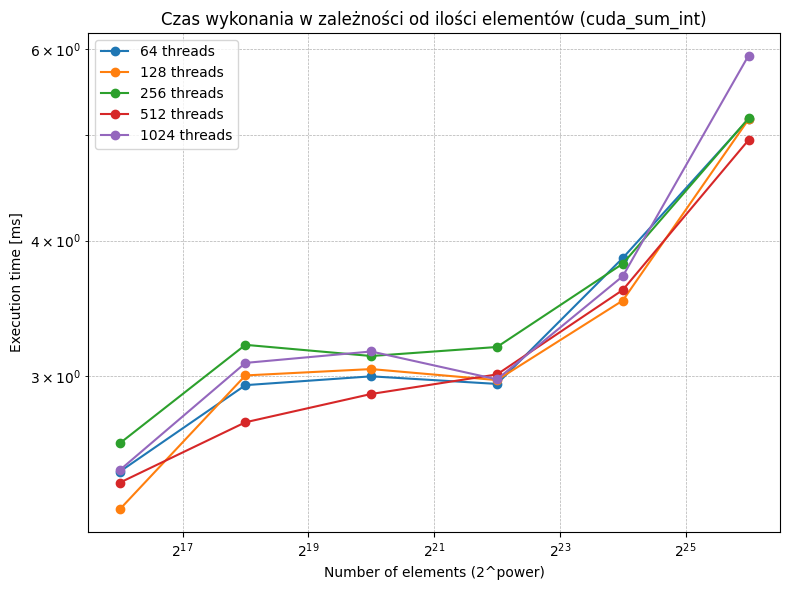

/tmp/ipykernel_278130/3534376971.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


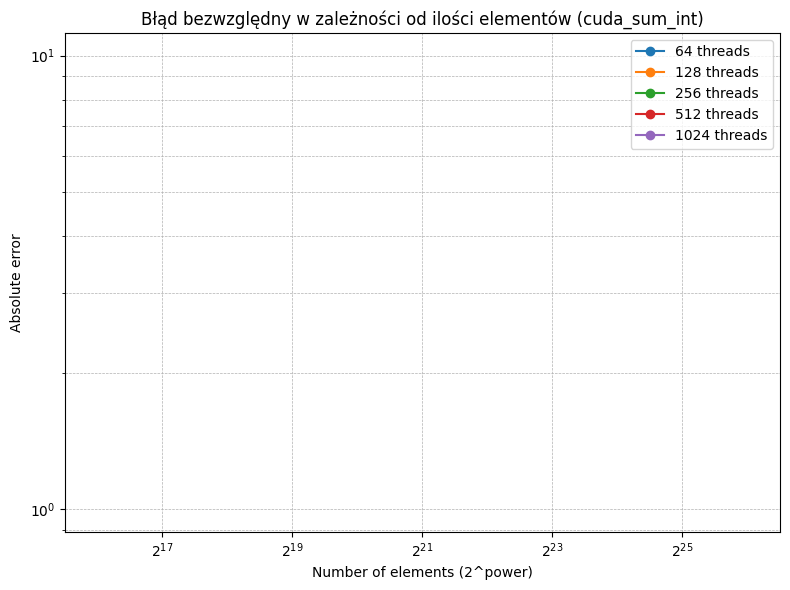

/tmp/ipykernel_278130/3534376971.py:54: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


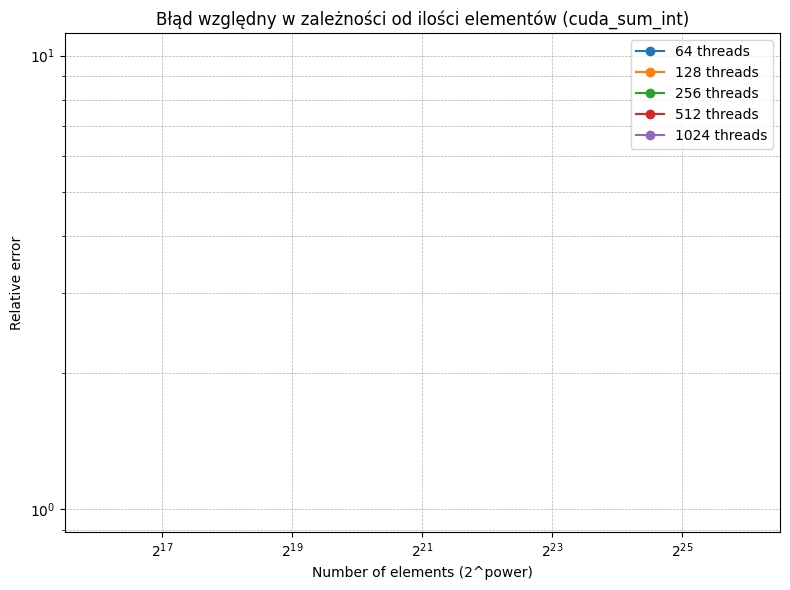

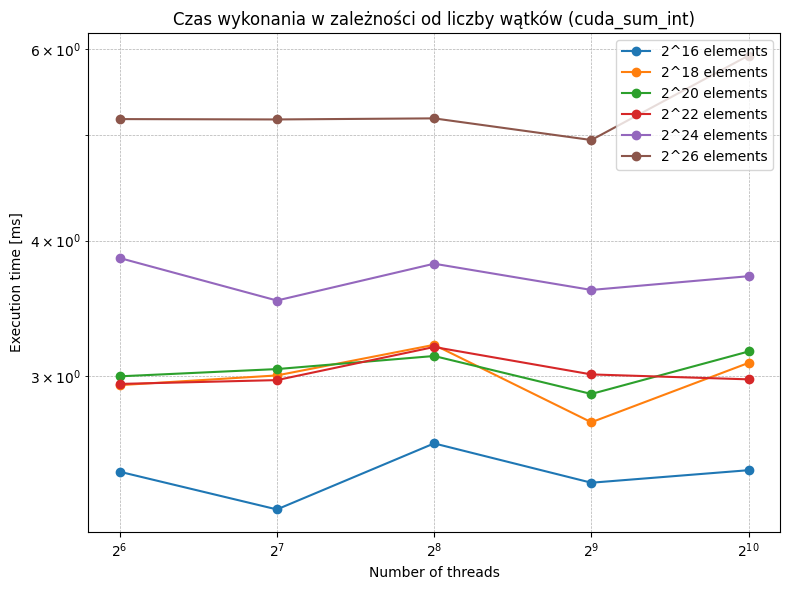

In [18]:
tech = "cuda"
op = "sum"
datatype = "int"

reduce_mean_openmp(f"../results/{tech}/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

### CUDA - SUM - DOUBLE

Zapisano wynik do ../results/cuda/cuda_sum_double.csv


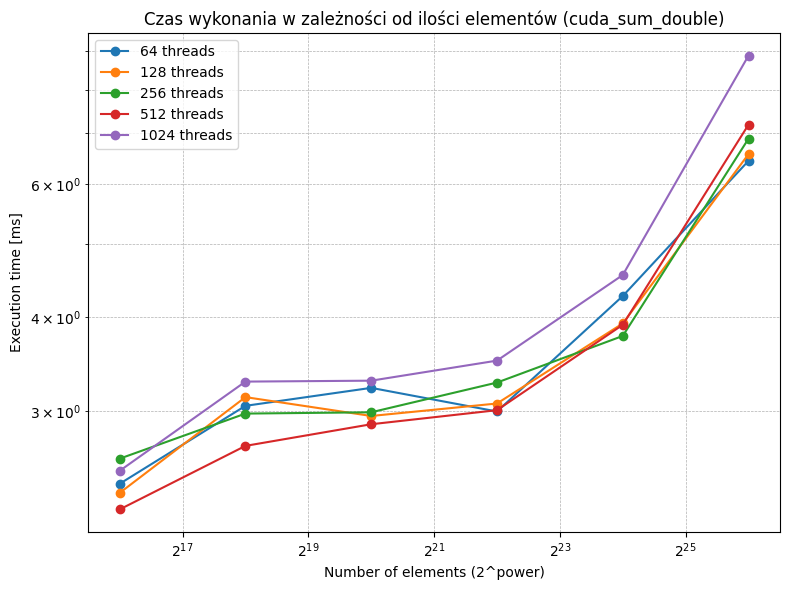

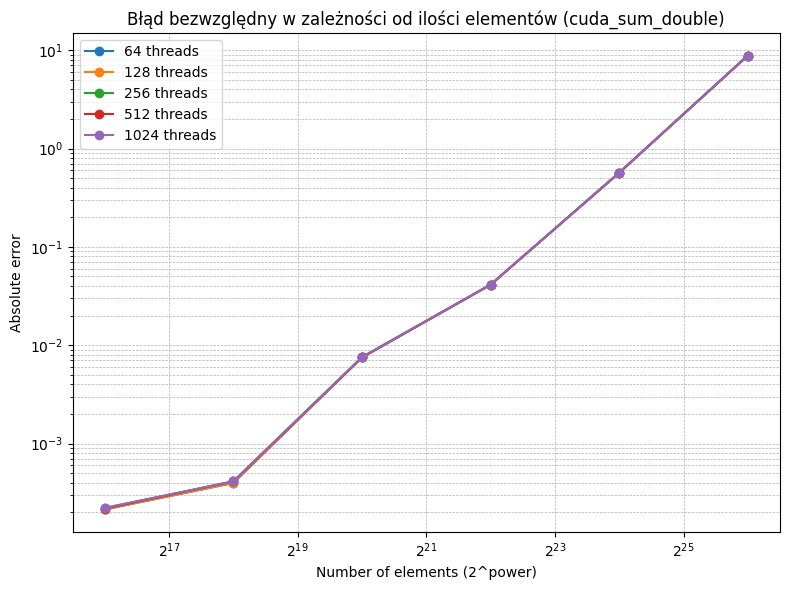

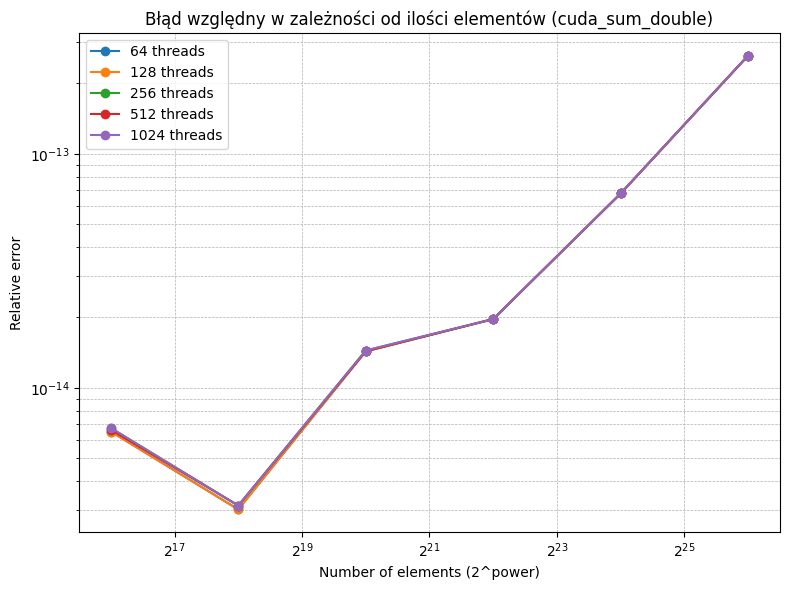

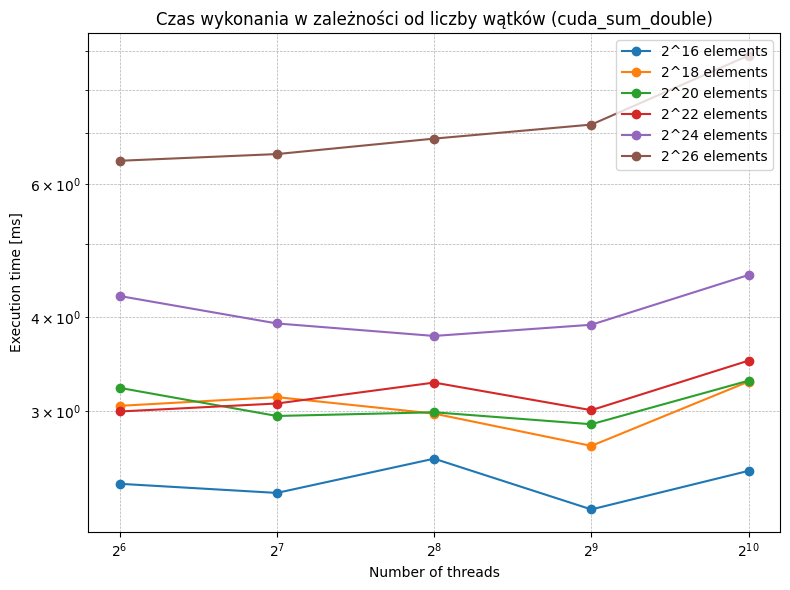

In [19]:
tech = "cuda"
op = "sum"
datatype = "double"

reduce_mean_openmp(f"../results/{tech}/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

### CUDA - MIN - INT 

Zapisano wynik do ../results/cuda/cuda_min_int.csv


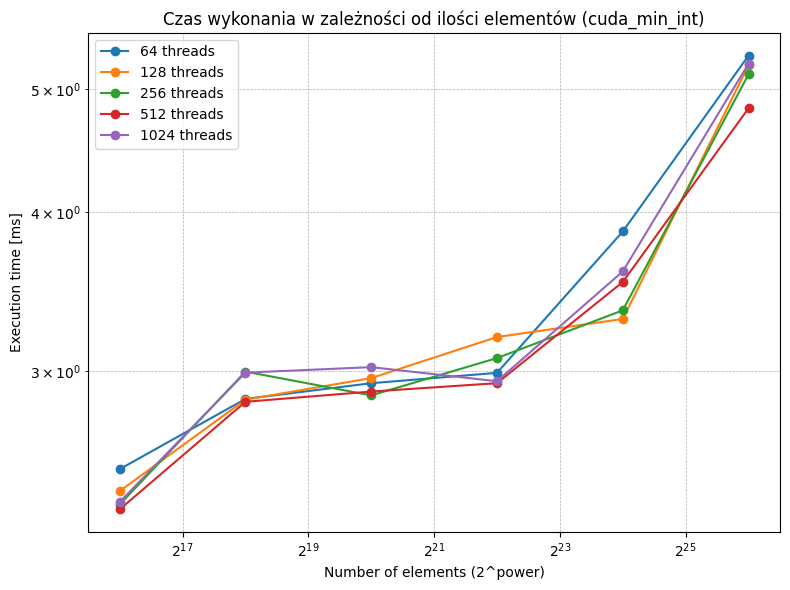

/tmp/ipykernel_278130/3534376971.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


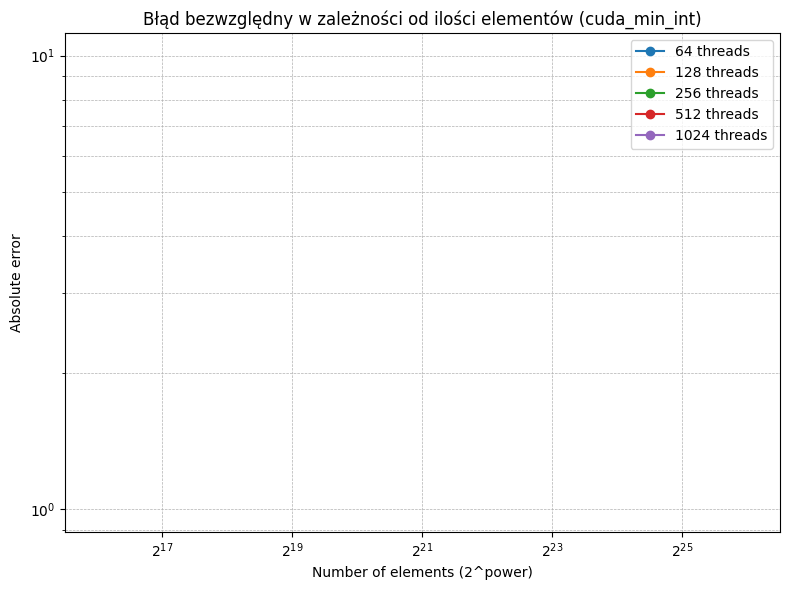

/tmp/ipykernel_278130/3534376971.py:54: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


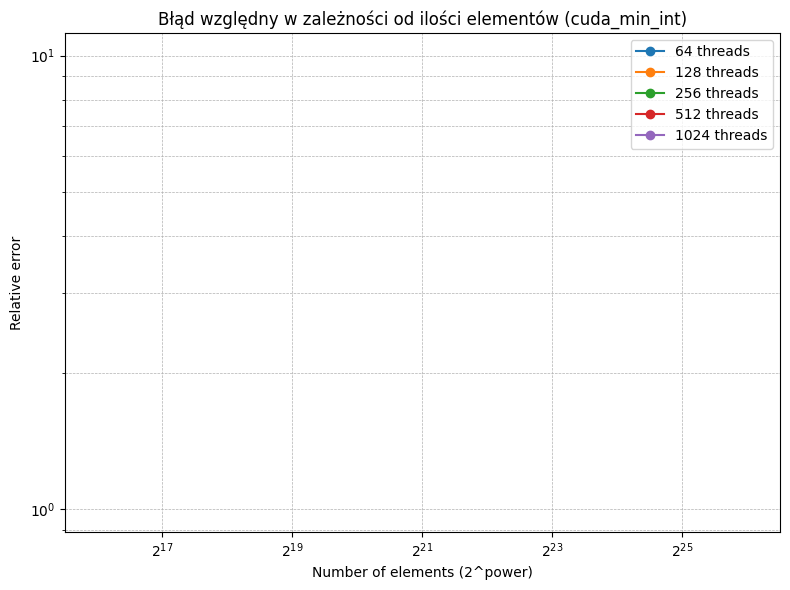

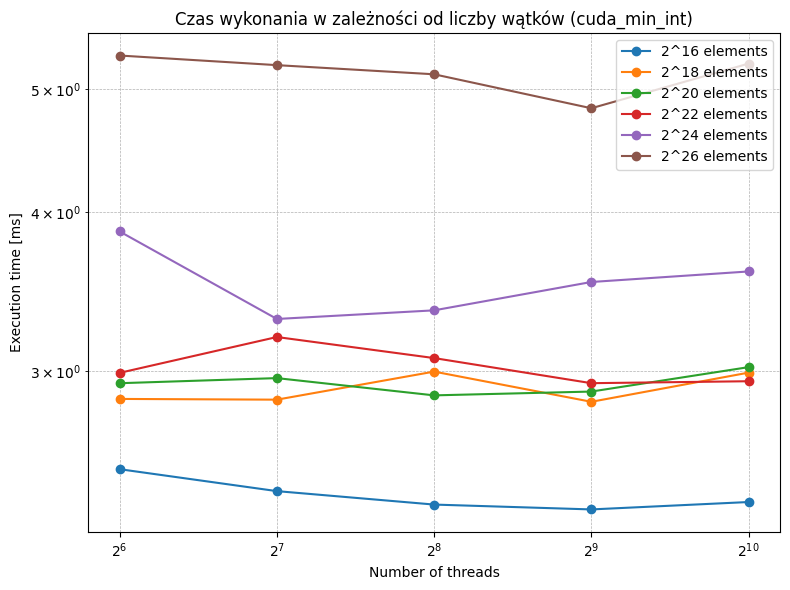

In [20]:
tech = "cuda"
op = "min"
datatype = "int"

reduce_mean_openmp(f"../results/{tech}/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

### CUDA - MIN - DOUBLE

Zapisano wynik do ../results/cuda/cuda_min_double.csv


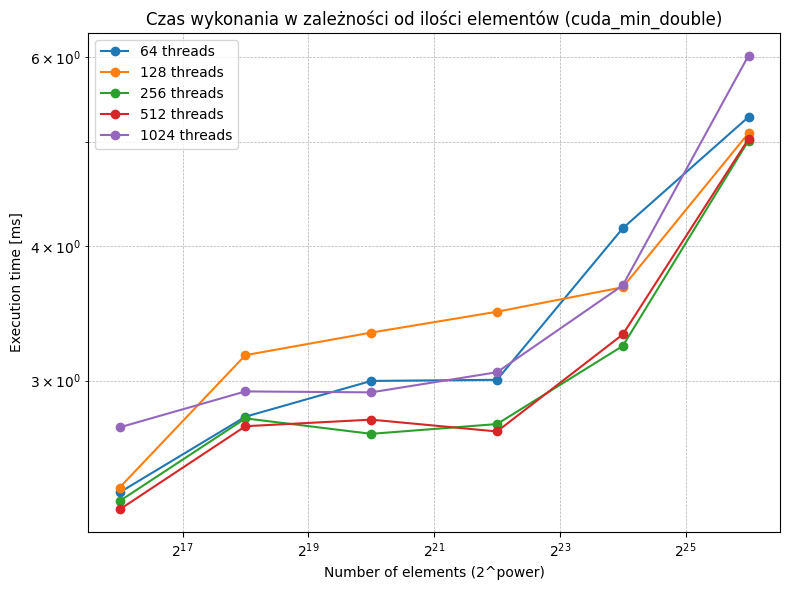

/tmp/ipykernel_278130/3534376971.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


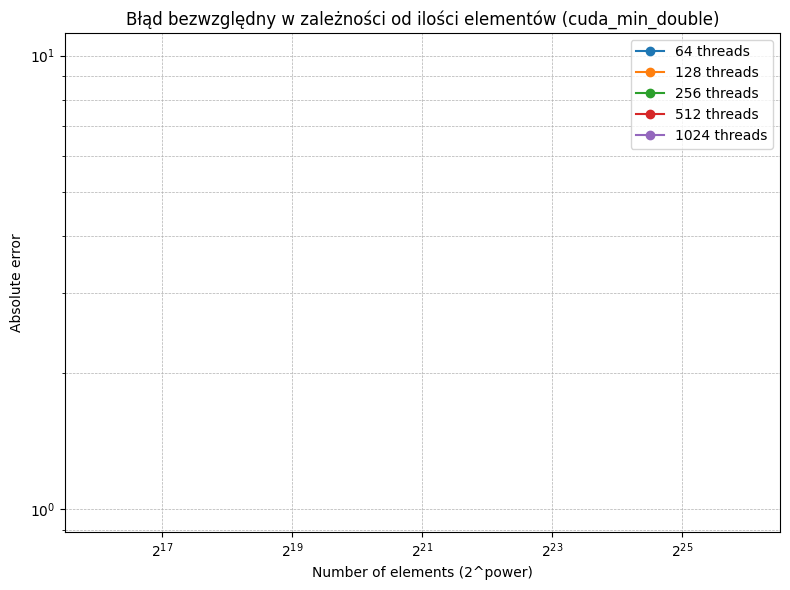

/tmp/ipykernel_278130/3534376971.py:54: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


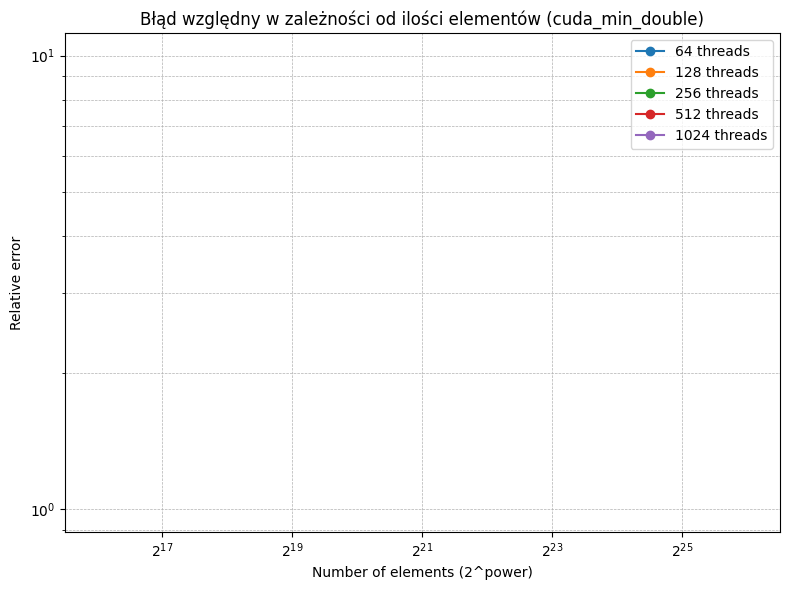

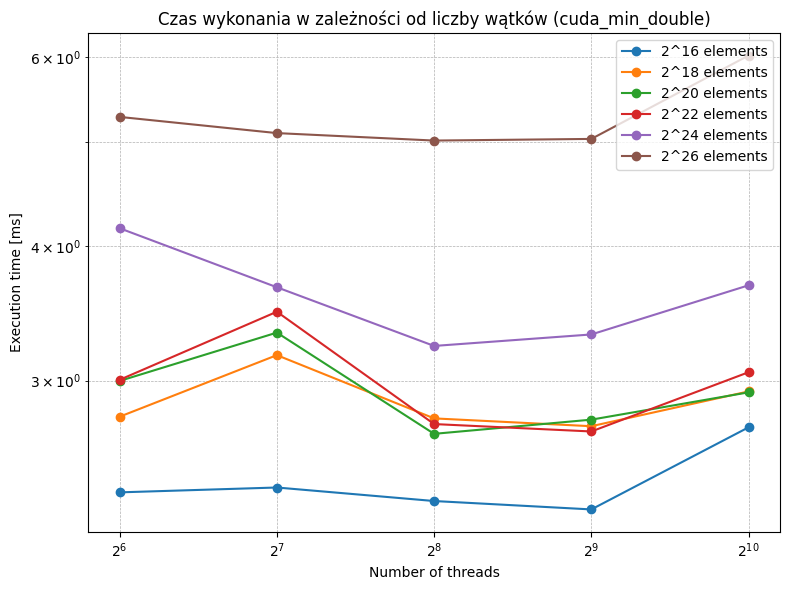

In [21]:
tech = "cuda"
op = "min"
datatype = "double"

reduce_mean_openmp(f"../results/{tech}/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

### CUDA - MAX - INT 

Zapisano wynik do ../results/cuda/cuda_max_int.csv


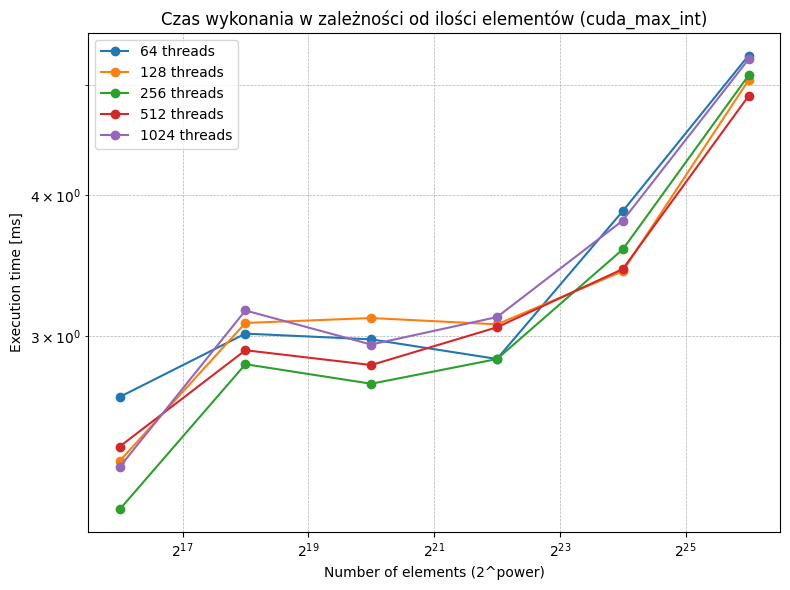

/tmp/ipykernel_278130/3534376971.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


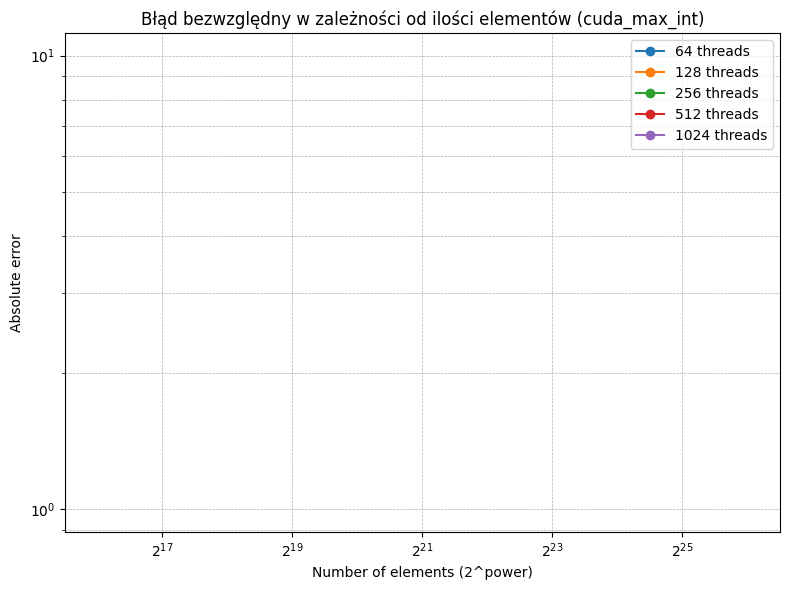

/tmp/ipykernel_278130/3534376971.py:54: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


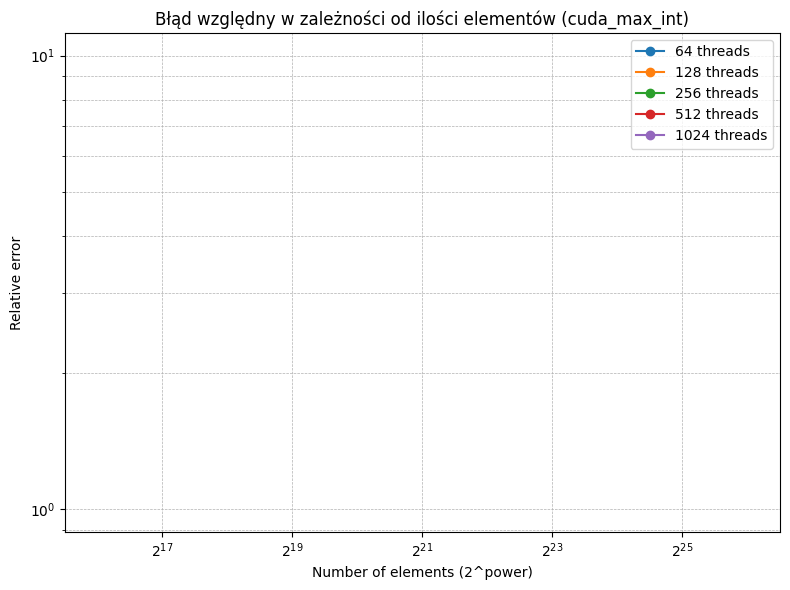

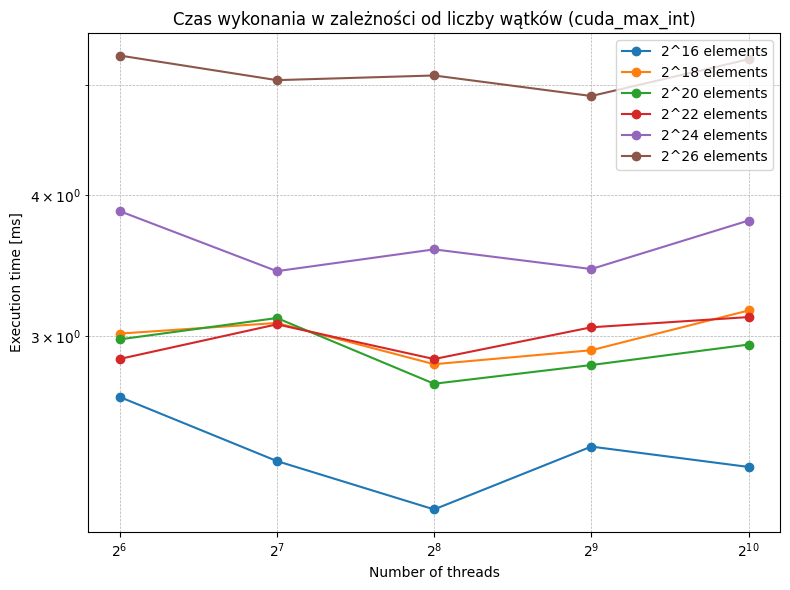

In [22]:
tech = "cuda"
op = "max"
datatype = "int"

reduce_mean_openmp(f"../results/{tech}/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

### CUDA - MAX - DOUBLE

Zapisano wynik do ../results/cuda/cuda_max_double.csv


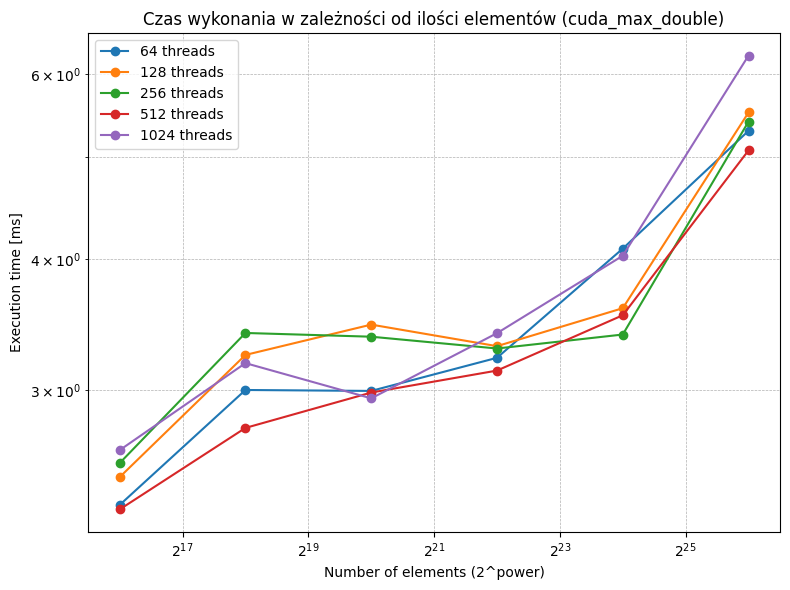

/tmp/ipykernel_278130/3534376971.py:34: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


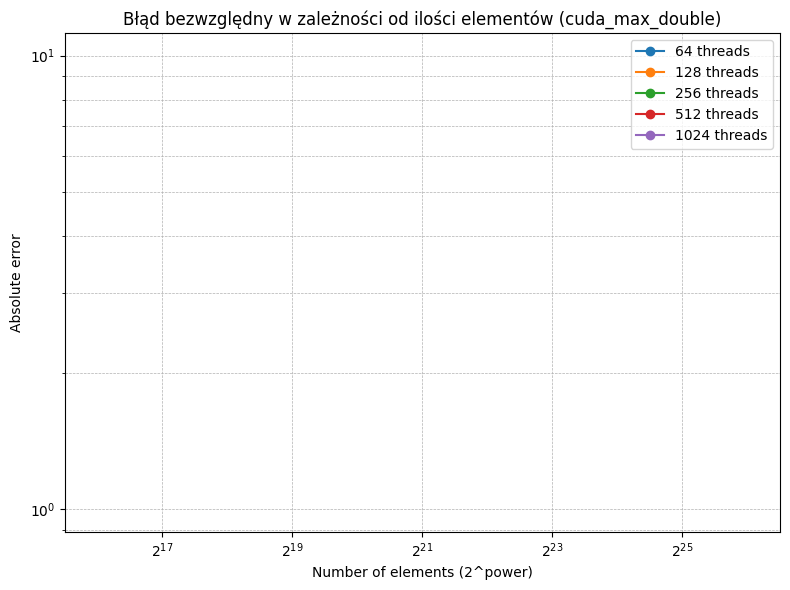

/tmp/ipykernel_278130/3534376971.py:54: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


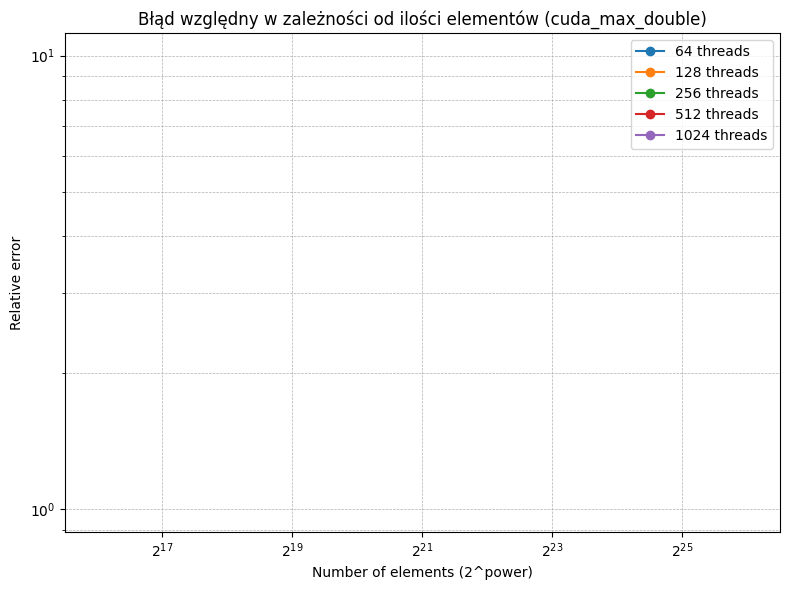

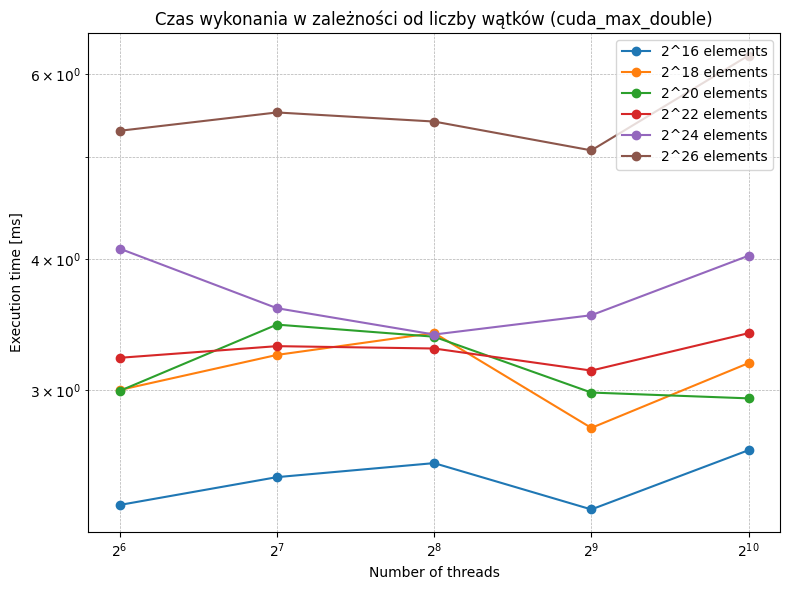

In [23]:
tech = "cuda"
op = "max"
datatype = "double"

reduce_mean_openmp(f"../results/{tech}/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

### CUDA - PREFIX - INT

In [ ]:
tech = "cuda"
op = "prefix"
datatype = "int"

reduce_mean_openmp(f"../results/{tech}/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)

### CUDA - PREFIX - DOUBLE

In [ ]:
tech = "cuda"
op = "prefix"
datatype = "double"

reduce_mean_openmp(f"../results/{tech}/{tech}_{op}_{datatype}.csv")

filename = f"{tech}_{op}_{datatype}.csv"
df = pd.read_csv("../results/" + tech + '/' + filename)

label = f"{tech}_{op}_{datatype}"
plot_time_vs_elements(df, dtype_label=label)
plot_abs_error_vs_elements(df, dtype_label=label)
plot_rel_error_vs_elements(df, dtype_label=label)
plot_time_vs_processes(df, dtype_label=label)